This notebook contains the analysis for Figures 1, 3 and Supplementary figures 1, 2, 3, 4 in the publication ["The Slowing Rate of CpG Depletion in SARS-CoV-2 Genomes Is Consistent with Adaptations to the Human Host"](https://academic.oup.com/mbe/article/39/3/msac029/6521032)

# Library imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Library version used:
- scipy: v1.7.1
- np: v1.21.2
- pd: v1.3.3
- sns: v0.11.2
- matplotlib: v3.4.2

# Data import

In [2]:
df_alpha = pd.read_csv('../csv_files/filtered_voc_alpha.csv').drop_duplicates()
df_beta = pd.read_csv('../csv_files/filtered_voc_beta.csv').drop_duplicates()
df_gamma = pd.read_csv('../csv_files/filtered_voc_gamma.csv').drop_duplicates()
df_delta = pd.read_csv('../csv_files/filtered_voc_delta.csv').drop_duplicates()
df_nonvocs = pd.read_csv('../csv_files/filtered_non_vocs.csv').drop_duplicates()
df = pd.read_csv('../csv_files/filtered_sars_cov2.csv').drop_duplicates()
df_omicron = pd.read_csv('../csv_files/filtered_voc_omicron.csv').drop_duplicates()

print(
    f'df_alpha shape: {df_alpha.shape}\n'
    f'df_beta shape: {df_beta.shape}\n'
    f'df_gamma shape: {df_gamma.shape}\n'
    f'df_delta shape: {df_delta.shape}\n'
    f'df_nonvocs shape: {df_nonvocs.shape}\n'
    f'df shape: {df.shape}\n'
    f'df_omicron shape: {df_omicron.shape}'
)

df_alpha shape: (616626, 17)
df_beta shape: (16247, 17)
df_gamma shape: (34162, 17)
df_delta shape: (32109, 17)
df_nonvocs shape: (717950, 17)
df shape: (1410423, 17)
df_omicron shape: (5436, 17)


# Some Initializations

In [3]:
df_alpha.name = 'VOC Alpha'
df_beta.name = 'VOC Beta'
df_gamma.name = 'VOC Gamma'
df_delta.name = 'VOC Delta'
df_nonvocs.name = 'Non-VOCs'
df.name = 'Complete'
df_omicron.name = 'VOC Omicron'

In [4]:
df_count_CG = df[['Infection_Timeline', 'count_CG']]
df_percent_CG = df[['Infection_Timeline', 'percent_CG']] 
df_percent_A = df[['Infection_Timeline', 'percent_A']]
df_percent_C = df[['Infection_Timeline', 'percent_C']]
df_percent_G = df[['Infection_Timeline', 'percent_G']]
df_percent_T = df[['Infection_Timeline', 'percent_T']]
df_GC_content = df[['Infection_Timeline', 'GC_content']]

df_count_CG.name = 'Number of CpGs'
df_percent_CG.name = 'Percentage of CpGs'
df_percent_A.name = 'Percentage of As'
df_percent_C.name = 'Percentage of Cs'
df_percent_G.name = 'Percentage of Gs'
df_percent_T.name = 'Percentage of Ts'
df_GC_content.name = 'GC content(%G+%C)'

# Visualizations

## Lineplots

In [5]:
sns.set_theme(
    style='white', rc={'axes.grid': True}
)
sns.set_context(
    'paper', font_scale=1, 
    rc={
        'lines.linewidth': 3, 
        'ytick.labelsize': 30, 
        'xtick.labelsize': 30, 
        'axes.edgecolor':0.05, 
        'axes.linewidth':2
    }
)

In [6]:
def lineplot_plotter(to_plot):
    """Takes in the dataframe to plot
    Specifications of the dataframe:
    - col 1 must be the Infection timeline
    - col 2 must have the numbers to plot
    - dataframe must have a name describing the numbers 
    being plotted to put it as a y-axis label
    """
    plt.figure(figsize=(20, 12))
    # shade of red color if decreasing trend; 
    # shade of green if increasing
    mean_first50 = to_plot.iloc[:, 1].head(500).mean()
    mean_last50 = to_plot.iloc[:, 1].tail(500).mean()
    if mean_first50 > mean_last50:
        pick_color='#d55e00'
    else:
        pick_color='#029e73'
        
    ax = sns.lineplot(
        x=to_plot.iloc[:, 0], y=to_plot.iloc[:, 1], data = to_plot, 
        marker='o', linewidth=3, color=pick_color
    )
    plt.setp(ax.get_xticklabels(), rotation=30)
    ax.set_xlabel(f'(n = {len(to_plot)} sequences)', size=45)
    ax.set_ylabel(f'{to_plot.name}', size=45)

NOTE that the function lineplot_plotter() takes considerable time to generate lineplot because of the CI calculations involved. See [documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) for more details on the CI band and related calculations.

### Supplementary Fig. 2: (a) to (e)

/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seabor

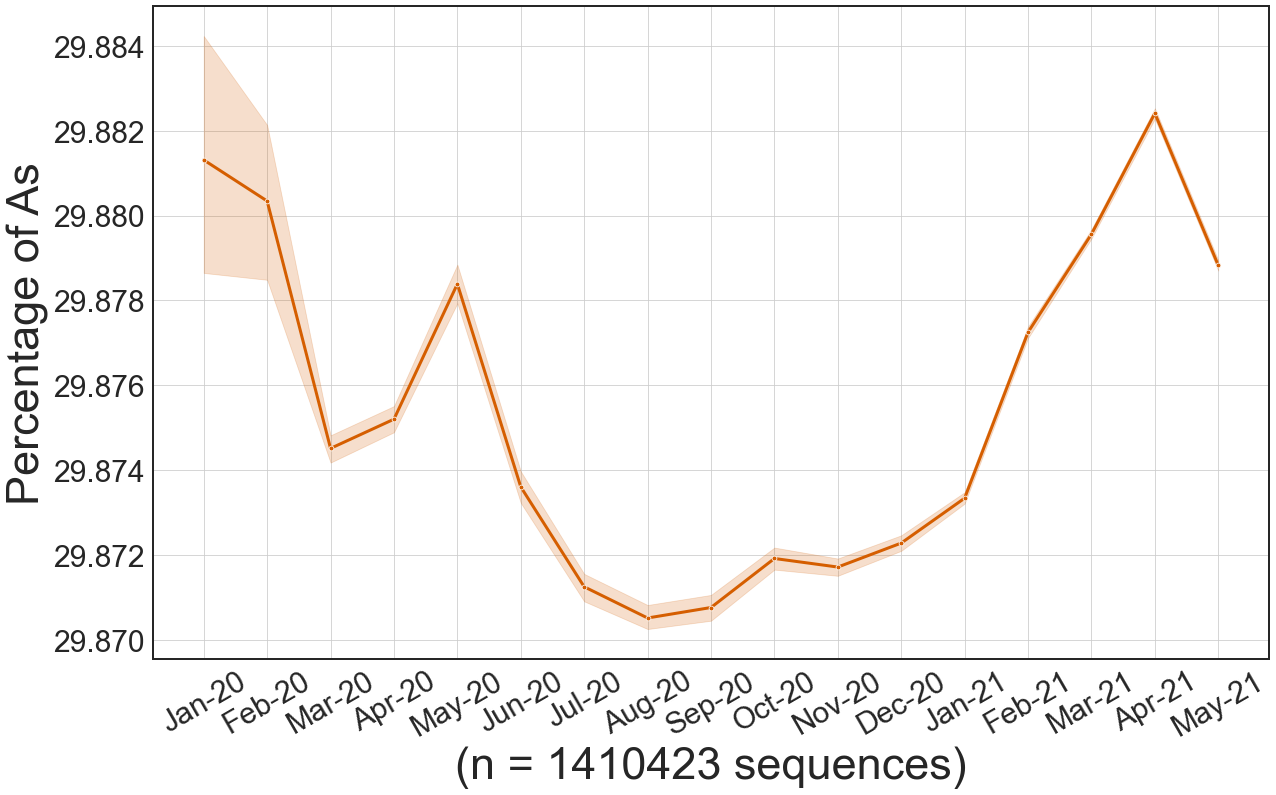

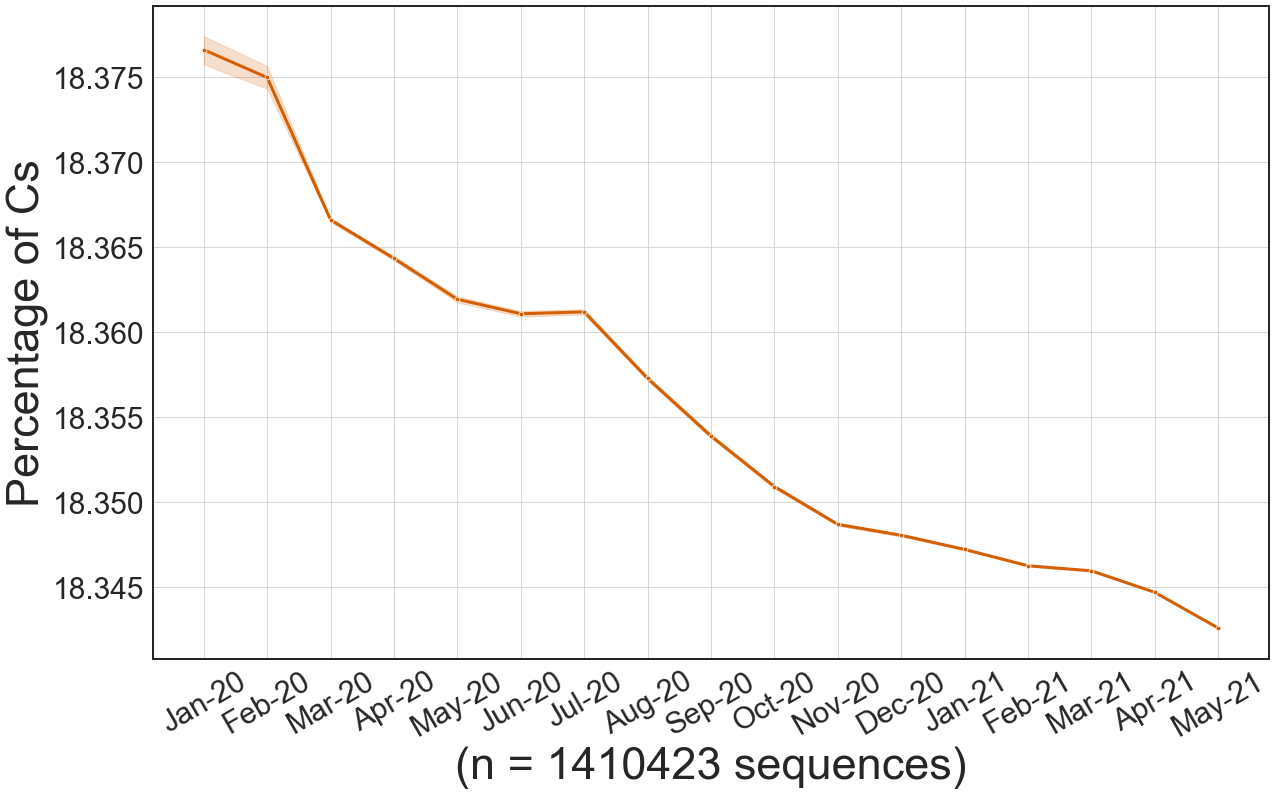

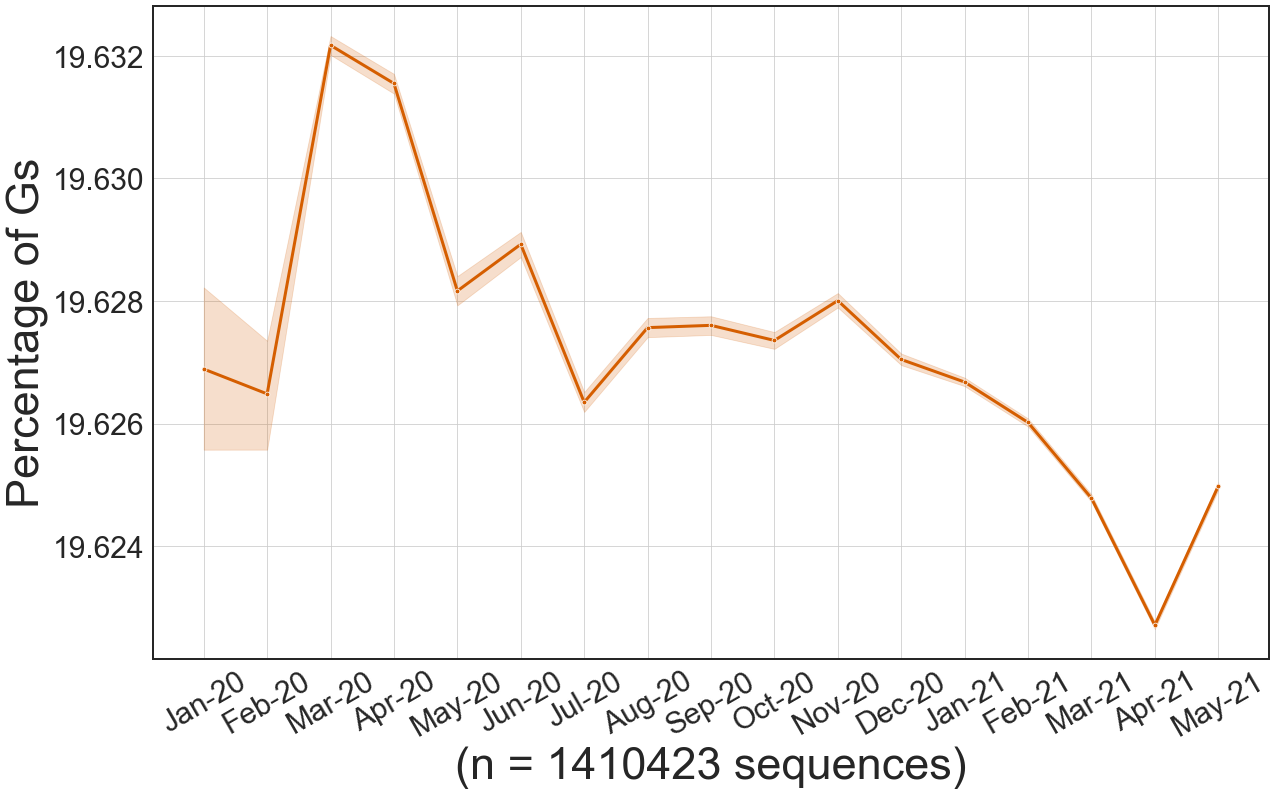

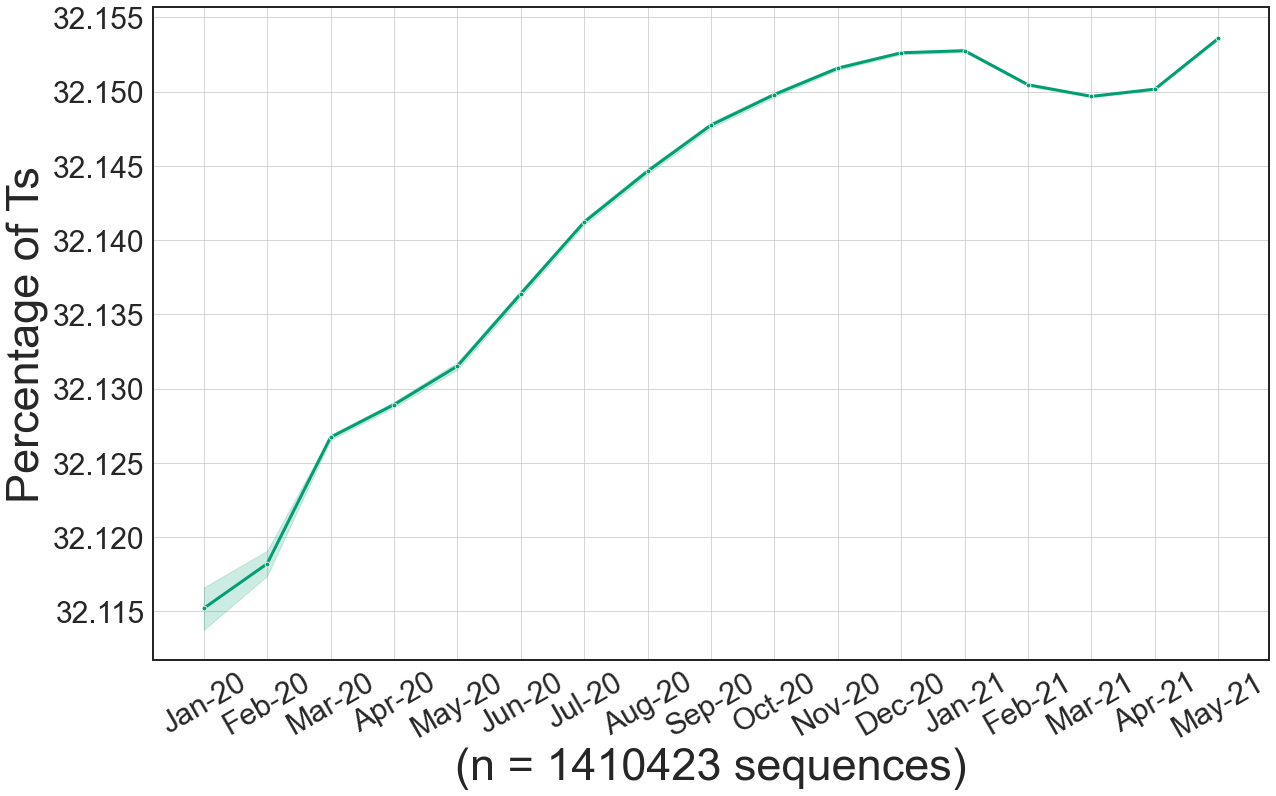

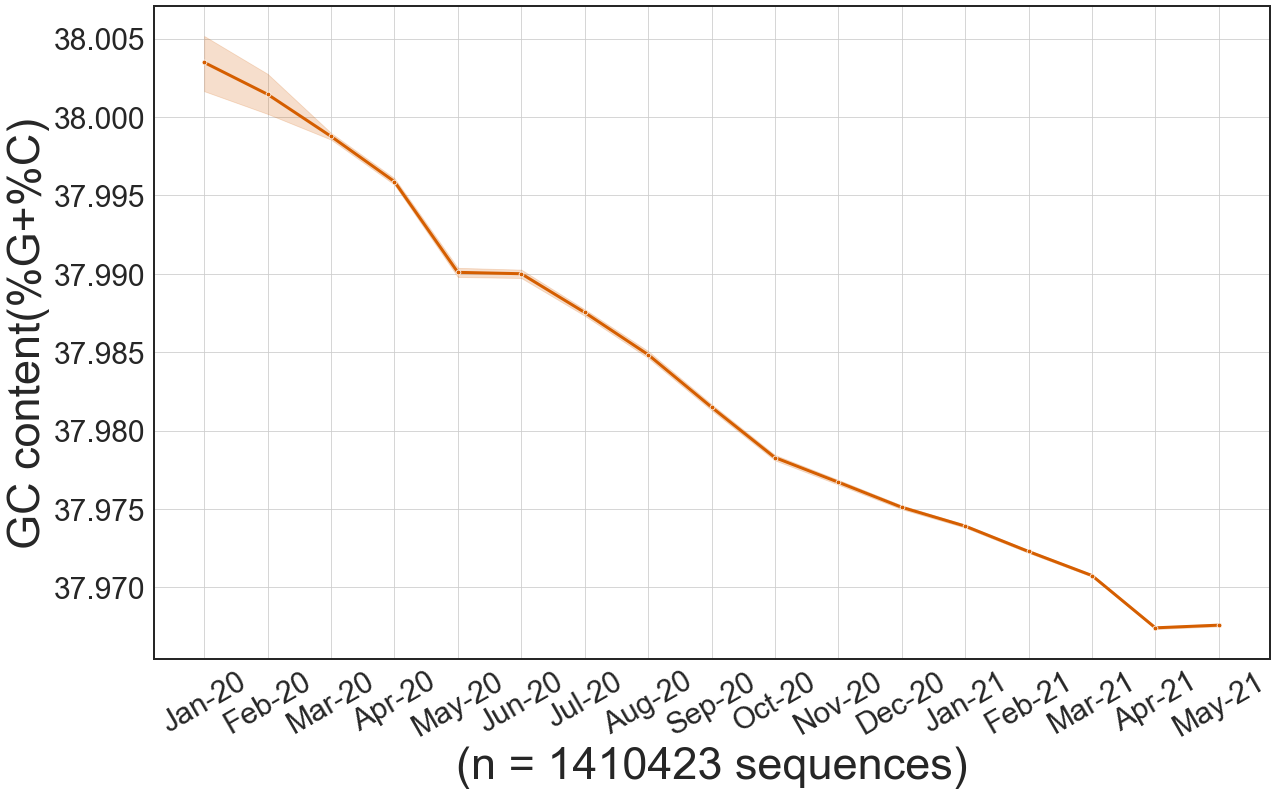

In [7]:
# lineplot_plotter(df_count_CG)
# lineplot_plotter(df_percent_CG)
lineplot_plotter(df_percent_A)
lineplot_plotter(df_percent_C)
lineplot_plotter(df_percent_G)
lineplot_plotter(df_percent_T)
lineplot_plotter(df_GC_content)

### Fig. 1.(a)

/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seabor

Text(0.055, 0.6, 'Number of CpGs')

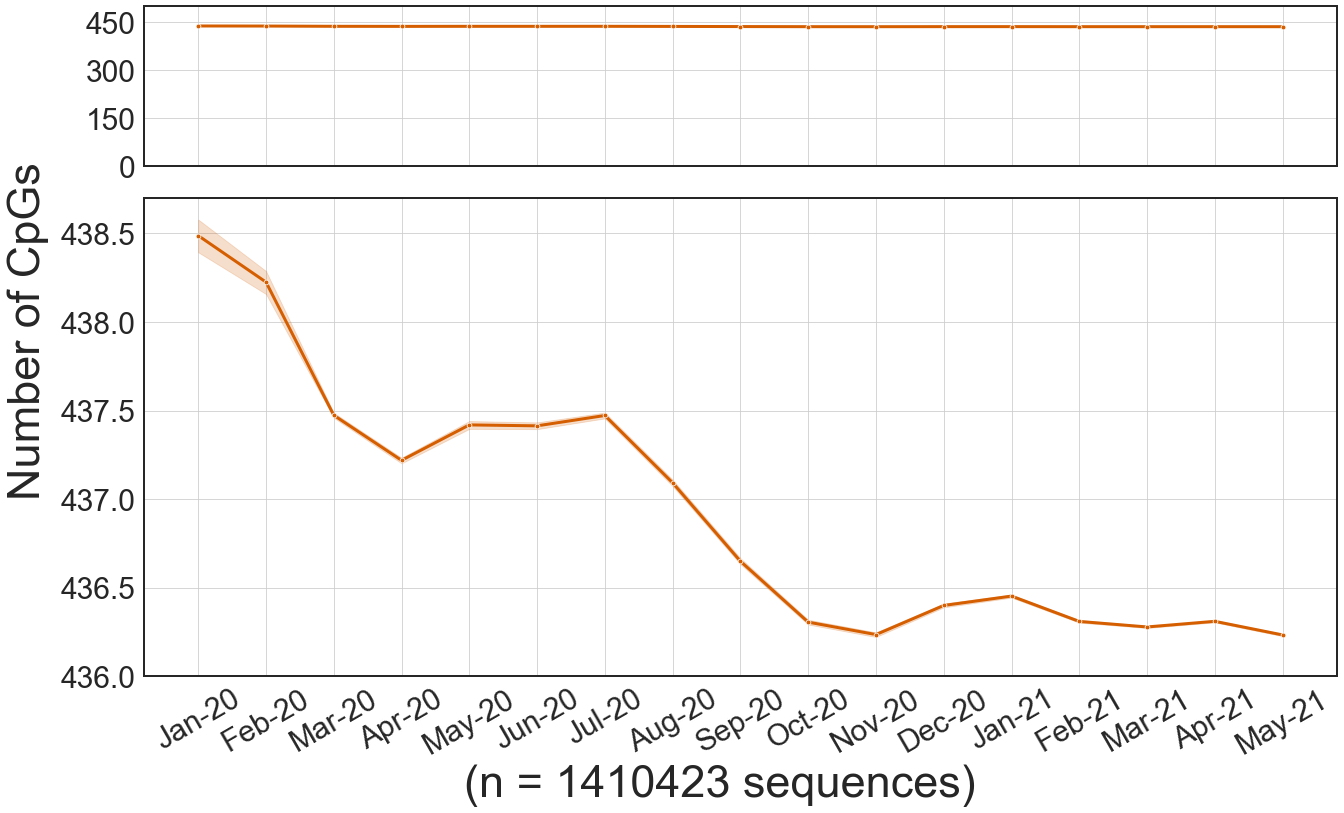

In [8]:
to_plot = df_count_CG

f, axes = plt.subplots(
    nrows=2, ncols=1, 
    sharex=True, sharey=False, 
    figsize=(20, 12), 
    gridspec_kw={'height_ratios': [1/3, 1]}
)
f.tight_layout()
plt.margins(x=None, y=None, tight=True)
# -------------------------- top plot --------------------------

ax1 = sns.lineplot(
    x=to_plot.iloc[:, 0], y=to_plot.iloc[:, 1], data = to_plot, 
    marker='o', linewidth=3, color='#d55e00', ax=axes[0]
)

axes[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
)
axes[0].set_yticks([0, 150, 300, 450])
axes[0].set_ylabel(None)
axes[0].set_ylim(0,500)
# ------------------------- bottom plot -------------------------

ax2 = sns.lineplot(
    x=to_plot.iloc[:, 0], y=to_plot.iloc[:, 1], data = to_plot, 
    marker='o', linewidth=3, color='#d55e00', ax=axes[1]
)

axes[1].set_ylim(436,438.7)
plt.setp(ax2.get_xticklabels(), rotation=30)
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
# ---------------------------------------------------------------
plt.subplots_adjust(bottom = 0.2, left = 0.15)
f.supxlabel(f'(n = {len(to_plot)} sequences)', size=45, y=.05, x=.55)
f.supylabel(f'{to_plot.name}', size=45, x=.055, y=.6)

### Fig. 1.(b)

/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seabor

Text(0.055, 0.6, 'Percentage of CpGs')

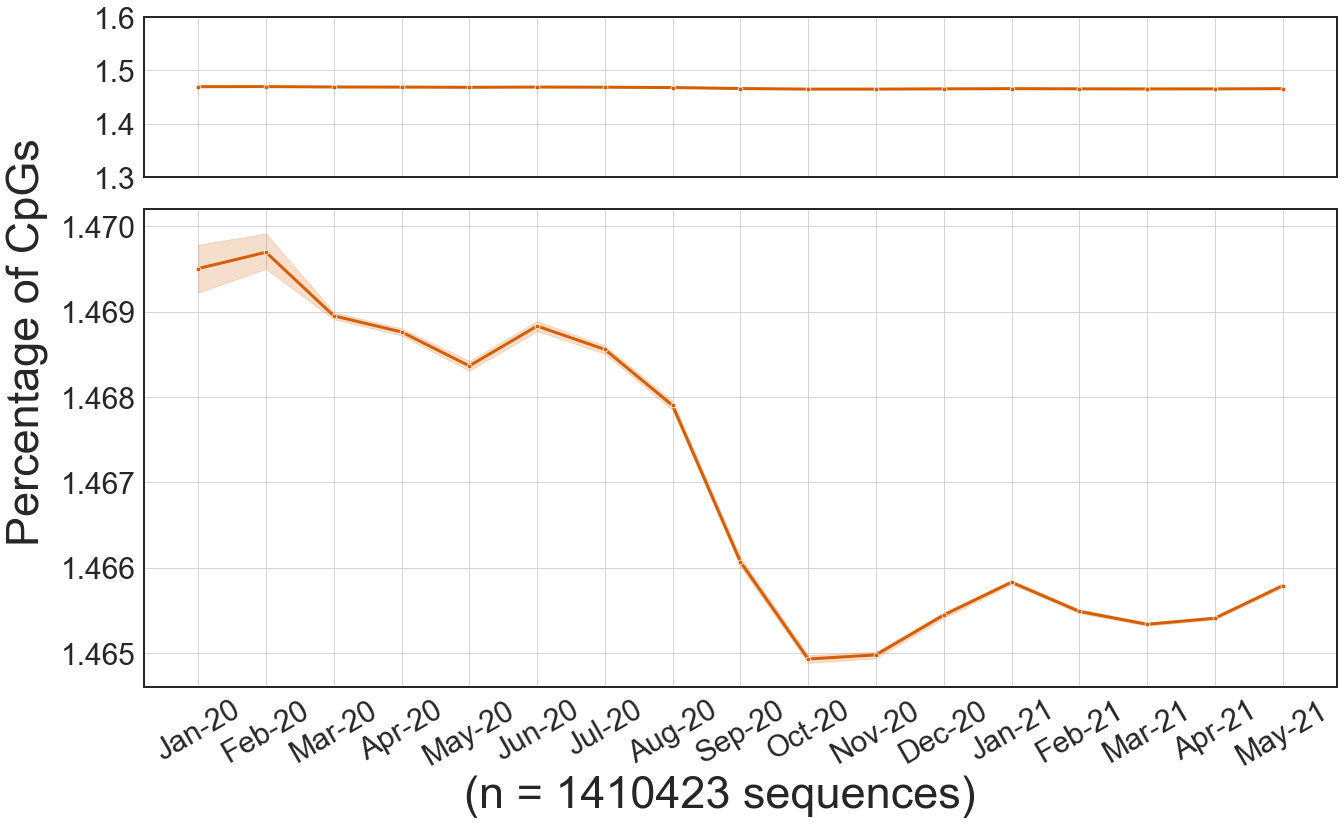

In [9]:
to_plot = df_percent_CG

f, axes = plt.subplots(
    nrows=2, ncols=1, 
    sharex=True, sharey=False, 
    figsize=(20, 12), 
    gridspec_kw={'height_ratios': [1/3, 1]}
)
f.tight_layout()
plt.margins(x=None, y=None, tight=True)
# -------------------------- top plot --------------------------

ax1 = sns.lineplot(
    x=to_plot.iloc[:, 0], y=to_plot.iloc[:, 1], data = to_plot, 
    marker='o', linewidth=3, color='#d55e00', ax=axes[0]
)

axes[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
)
axes[0].set_yticks(np.arange(1.30, 1.60+0.1, 0.1))
axes[0].set_ylabel(None)
axes[0].set_ylim(1.3,1.6)
# ------------------------- bottom plot -------------------------

ax2 = sns.lineplot(
    x=to_plot.iloc[:, 0], y=to_plot.iloc[:, 1], data = to_plot, 
    marker='o', linewidth=3, color='#d55e00', ax=axes[1]
)

axes[1].set_ylim(1.4646,1.4702)
plt.setp(ax2.get_xticklabels(), rotation=30)
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
# ---------------------------------------------------------------
plt.subplots_adjust(bottom = 0.2, left = 0.15)
f.supxlabel(f'(n = {len(to_plot)} sequences)', size=45, y=.05, x=.55)
f.supylabel(f'{to_plot.name}', size=45, x=.055, y=.6)

### Supplementary Fig. 3

In [10]:
df_nongamma_count_CG = pd.read_csv('../csv_files/nongamma_count_CG.csv')
df_nongamma_count_CG.name = f'Non-Gamma sequences (n={len(df_nongamma_count_CG)})'
df_nongamma_count_CG['hue'] = f'Non-Gamma sequences (n={len(df_nongamma_count_CG)})'

df_allseqs = df.loc[:, ['Infection_Timeline', 'count_CG']]
df_allseqs.name = f'All sequences (n={len(df_allseqs)})'
df_allseqs['hue'] = f'All sequences (n={len(df_allseqs)})'


df_for_superimposition_plot = pd.concat([df_allseqs, df_nongamma_count_CG])
df_for_superimposition_plot.reset_index(drop=True, inplace=True)
df_for_superimposition_plot.sample(n=5)

,Infection_Timeline,count_CG,hue
725034,Mar-21,436.0,All sequences (n=1410423)
2060111,Feb-21,437.0,Non-Gamma sequences (n=1387244)
431085,Jan-21,436.0,All sequences (n=1410423)
127155,Jul-20,436.0,All sequences (n=1410423)
1884315,Jan-21,435.0,Non-Gamma sequences (n=1387244)


/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
/Users/iamakhilverma/anaconda3/lib/python3.8/site-packages/seaborn

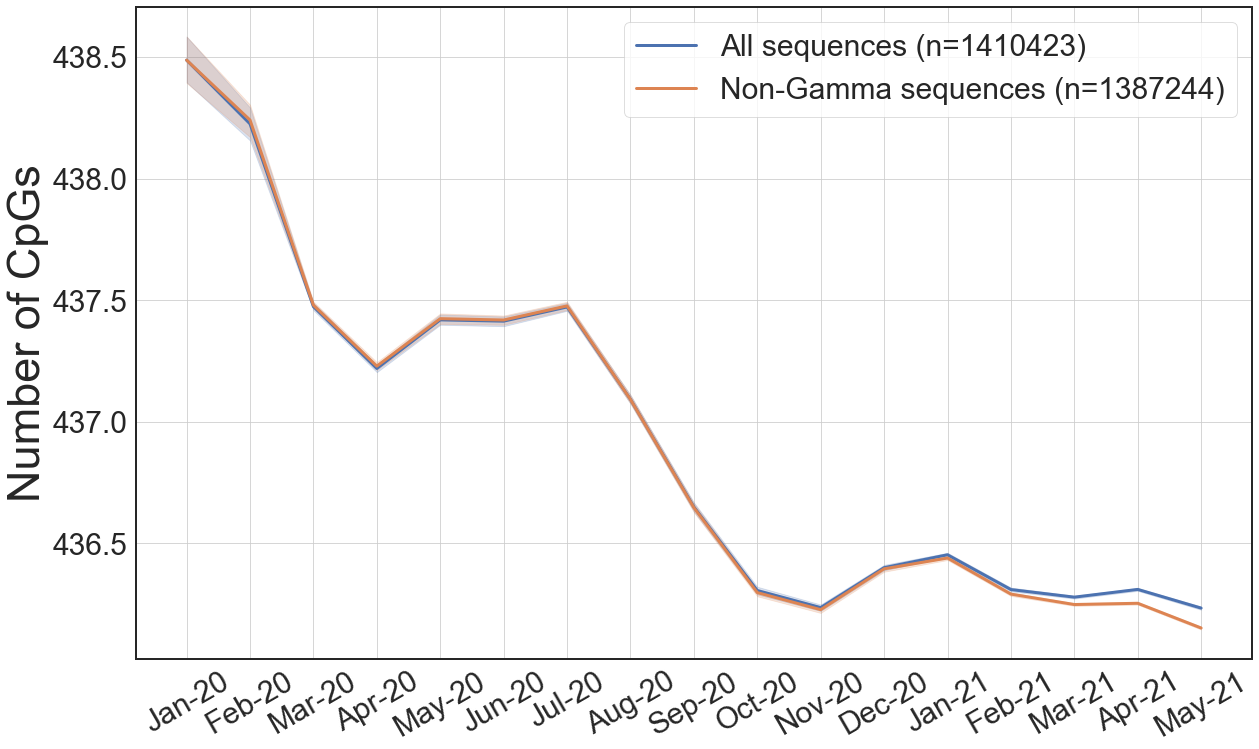

In [11]:
plt.figure(figsize=(20, 12))
plt.margins(x=None, y=None, tight=True)

ax = sns.lineplot(
    x='Infection_Timeline', y='count_CG', data=df_for_superimposition_plot, 
    markers=True, linewidth=3, hue='hue'
)
plt.setp(ax.get_xticklabels(), rotation=30)
ax.set_xlabel(None)
ax.set_ylabel('Number of CpGs', size=45)
# plt.subplots_adjust(bottom = 0.2, left = 0.15)
ax.legend(loc='best', fontsize=30)

### Supplementary Fig. 1

In [12]:
jan20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-01-31')]
feb20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-02-29')]
mar20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-03-31')]
apr20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-04-30')]
may20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-05-31')]
jun20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-06-30')]
jul20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-07-31')]
aug20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-08-31')]
sep20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-09-30')]
oct20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-10-31')]
nov20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-11-30')]
dec20 = df[(df.dates>='2020-01-01') & (df.dates<='2020-12-31')]
jan21 = df[(df.dates>='2020-01-01') & (df.dates<='2021-01-31')]
feb21 = df[(df.dates>='2020-01-01') & (df.dates<='2021-02-28')]
mar21 = df[(df.dates>='2020-01-01') & (df.dates<='2021-03-31')]
apr21 = df[(df.dates>='2020-01-01') & (df.dates<='2021-04-30')]
may21 = df[(df.dates>='2020-01-01') & (df.dates<='2021-05-31')]


Information on number of documented cases of
SARS-CoV-2 infections were obtained from [Our World in
Data](https://ourworldindata.org/), last accessed October 1,
2021 (Ritchie et al. 2020). A total of 170,787,092 million cases
were documented from January 1, 2020 to May 31, 2021.

In [13]:
supp1_dict = {
    'Cummulative sequences deposited in GISAID': [
        len(jan20), 
        len(feb20), 
        len(mar20), 
        len(apr20), 
        len(may20), 
        len(jun20), 
        len(jul20), 
        len(aug20), 
        len(sep20), 
        len(oct20), 
        len(nov20), 
        len(dec20), 
        len(jan21), 
        len(feb21), 
        len(mar21), 
        len(apr21), 
        len(may21)
    ], 
    'Cummulative Infections Worldwide': [
        9927, 
        86022, 
        876255, 
        3281703, 
        6189005, 
        10458817, 
        17604158, 
        25507327, 
        34011270, 
        46144879, 
        63422427, 
        83638090, 
        103082130, 
        114232824, 
        128951527, 
        151457784, 
        170787092
    ], 
    'dates': [
        '2020-01-31', 
        '2020-02-29', 
        '2020-03-31', 
        '2020-04-30', 
        '2020-05-31', 
        '2020-06-30', 
        '2020-07-31', 
        '2020-08-31', 
        '2020-09-30', 
        '2020-10-31', 
        '2020-11-30', 
        '2020-12-31', 
        '2021-01-31', 
        '2021-02-28', 
        '2021-03-31', 
        '2021-04-30', 
        '2021-05-31'
    ]
}

df_supp1 = pd.DataFrame(data=supp1_dict)

In [14]:
df_supp1['Infection_Timeline'] = pd.to_datetime(df_supp1['dates'], format='%Y-%m-%d')
df_supp1['Infection_Timeline'] = df_supp1['Infection_Timeline'].dt.strftime('%b-%y')

df_supp1['Cummulative sequences deposited in GISAID (in millions)'
        ] = df_supp1['Cummulative sequences deposited in GISAID'].div(10**6)
df_supp1['Cummulative Infections Worldwide (in millions)'
        ] = df_supp1['Cummulative Infections Worldwide'].div(10**6)

In [15]:
df_supp1.head(5)

,Cummulative sequences deposited in GISAID,Cummulative Infections Worldwide,dates,Infection_Timeline,Cummulative sequences deposited in GISAID (in millions),Cummulative Infections Worldwide (in millions)
0,330,9927,2020-01-31,Jan-20,0.000330,0.009927
1,1368,86022,2020-02-29,Feb-20,0.001368,0.086022
2,34928,876255,2020-03-31,Mar-20,0.034928,0.876255
3,67737,3281703,2020-04-30,Apr-20,0.067737,3.281703
4,84568,6189005,2020-05-31,May-20,0.084568,6.189005


In [16]:
correlation_coefficient = df_supp1['Cummulative sequences deposited in GISAID (in millions)'].corr(df_supp1['Cummulative Infections Worldwide (in millions)'], method='pearson')

print(correlation_coefficient)

0.9705670950989467


stats.linregress(x, y=None, alternative='two-sided')
Calculate a linear least-squares regression for two sets of measurements.
(https://docs.scipy.org/doc/scipy/reference/generated/stats.linregress.html)

In [17]:
res = stats.linregress(
    df_supp1['Cummulative sequences deposited in GISAID (in millions)'], 
    df_supp1['Cummulative Infections Worldwide (in millions)']
)
print(f'R-squared: {res.rvalue**2:.6f}')


R-squared: 0.942000


#### Supplementary Fig. 1.(a)

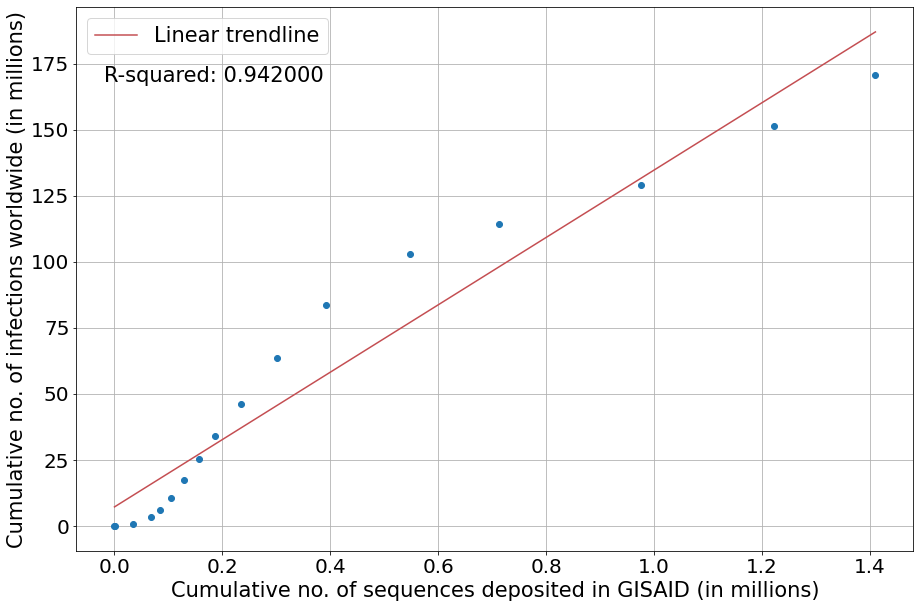

In [18]:
plt.figure(figsize=(15,10), facecolor=(1, 1, 1))
plt.style.use('default')
plt.grid(True)

plt.plot(df_supp1['Cummulative sequences deposited in GISAID (in millions)'], df_supp1['Cummulative Infections Worldwide (in millions)'], 'o') # , label='original data'
plt.plot(df_supp1['Cummulative sequences deposited in GISAID (in millions)'], res.intercept + res.slope*df_supp1['Cummulative sequences deposited in GISAID (in millions)'], 'r', label='Linear trendline')

plt.ylabel('Cumulative no. of infections worldwide (in millions)', fontsize = 21)
plt.xlabel('Cumulative no. of sequences deposited in GISAID (in millions)', fontsize = 21)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
textstr = f'R-squared: {res.rvalue**2:.6f}'
# place a text box in upper left in axes coords
plt.gca().text(-0.02, 174, textstr, fontsize=21, verticalalignment='top')
plt.legend(loc=2, fontsize=21)


#### Supplementary Fig. 1.(b)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

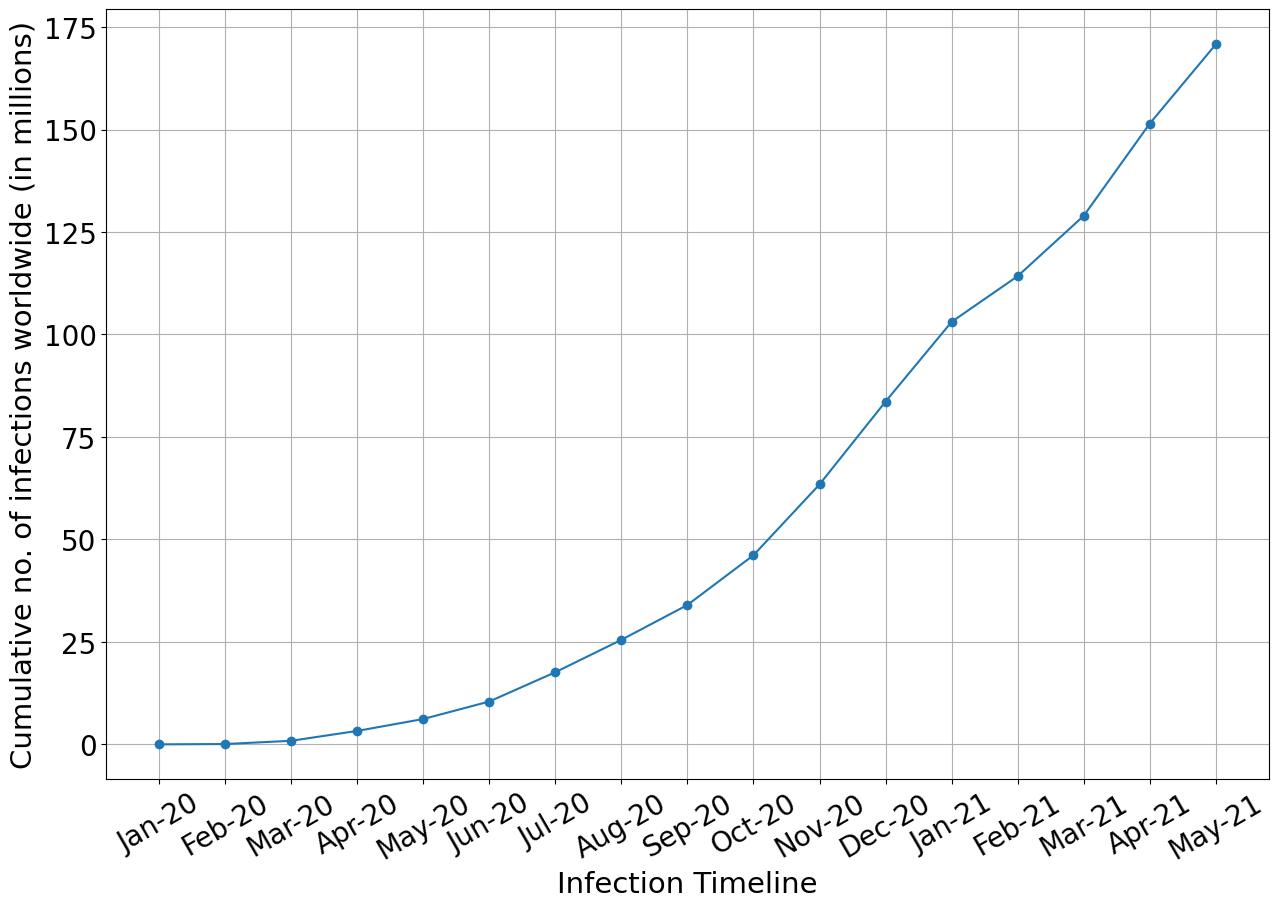

In [19]:
plt.figure(figsize=(15,10), facecolor=(1, 1, 1))
plt.style.use('default')
plt.grid(True)

plt.plot(df_supp1['Infection_Timeline'], df_supp1['Cummulative Infections Worldwide (in millions)'], marker='o')

plt.ylabel('Cumulative no. of infections worldwide (in millions)', fontsize = 21)
plt.xlabel('Infection Timeline', fontsize = 21)
plt.xticks(fontsize=20, rotation='30')
plt.yticks(fontsize=20)


## Violinplots

In [20]:
df_earliest_two_months = df[(df.dates <= '2020-02-29') & (df.dates >= '2020-01-01')]
df_earliest_two_months = df_earliest_two_months.assign(hue='2020')
df_last_two_months = df[(df.dates >= '2021-04-01') & (df.dates <= '2021-05-31')]
df_last_two_months = df_last_two_months.assign(hue='2021')

print(f'Number of entries in earliest two months = {len(df_earliest_two_months)}'
    f',\nNumber of entries in last two months = {len(df_last_two_months)}')

# ------------------------------------------------------------------------------------

df_count_CG_V = pd.concat(
    [
        df_earliest_two_months.loc[:, ['hue', 'count_CG']], 
        df_last_two_months.loc[:, ['hue', 'count_CG']]
    ]
).reset_index(drop=True)

df_percent_CG_V = pd.concat(
    [
        df_earliest_two_months.loc[:, ['hue', 'percent_CG']], 
        df_last_two_months.loc[:, ['hue', 'percent_CG']]
    ]
).reset_index(drop=True)

df_ObyE_CG_V = pd.concat(
    [
        df_earliest_two_months.loc[:, ['hue', 'ObyE_CG']], 
        df_last_two_months.loc[:, ['hue', 'ObyE_CG']]
    ]
).reset_index(drop=True)

df_ObyE_GC_V = pd.concat(
    [
        df_earliest_two_months.loc[:, ['hue', 'ObyE_GC']], 
        df_last_two_months.loc[:, ['hue', 'ObyE_GC']]
    ]
).reset_index(drop=True)

df_GC_content_V = pd.concat(
    [
        df_earliest_two_months.loc[:, ['hue', 'GC_content']], 
        df_last_two_months.loc[:, ['hue', 'GC_content']]
    ]
).reset_index(drop=True)


df_count_CG_V.name = 'Number of CpGs'
df_percent_CG_V.name = 'Percentage of CpGs'
df_ObyE_CG_V.name = 'CpGs O/E'
df_ObyE_GC_V.name = 'GpCs O/E'
df_GC_content_V.name = 'GC content(%G+%C)'

Number of entries in earliest two months = 1368,
Number of entries in last two months = 433823


In [21]:
sns.set_theme(
    style='white', rc={'axes.grid': True}
)
sns.set_context(
    'paper', font_scale=1, 
    rc={ 
        'ytick.labelsize': 50, 
        'xtick.labelsize': 50, 
        'axes.edgecolor':0.05, 
        'axes.linewidth':2
    }
)

In [22]:
# This plotter was used for violinplots used in the publication

def violinplot_plotter(to_plot):
    """Takes in the dataframe to plot
    Specifications of the dataframe:
    - col 1 must have entries from earliest two months only
    - col 2 must have entries from last two months only
    - dataframe must have a name describing the numbers 
    being plotted to put it as a y-axis label
    """
    plt.figure(figsize=(16*1.2, 24))
    
    ax = sns.violinplot(
        x='hue', y=to_plot.columns.values[1], 
        data=to_plot, 
        order=['2020', '2021'], 
        inner='quartile', 
        linewidth=0.5, bw=0.3, 
        palette='pastel'
    )
    
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_linewidth(2)
        l.set_color('black')
    for l in ax.lines[1::3]:
        l.set_linestyle('-')
        l.set_linewidth(2.4)
        l.set_color('black')
    ax.set_xticklabels(
        [
            '(Jan, Feb)-2020''\n'f'(n = {len(df_earliest_two_months)})', 
            '(Apr, May)-2021''\n'f'(n = {len(df_last_two_months)})'
        ]
    )
    ax.text(
        0.5, 1.06, r'$p < 0.0001$', 
        horizontalalignment='center', verticalalignment='top', 
        transform=ax.transAxes, 
        size=60
    )
    ax.set_ylabel(f'{to_plot.name}', size=60)
    ax.set_xlabel(None)
    plt.subplots_adjust(left = 0.2)
    

### Mann-Whitney U test (For Fig. 1.(c), Fig. 1.(d), and Fig. 3: (a) to (c))

[Mann-Whitney U rank test on two independent samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions.

Now, we'll conduct Mann-Whitney U test for the Fig. 1.(c), Fig. 1.(d), and Fig. 3: (a) to (c) of the article.

In [23]:
print('Mann-Whitney U test results: ')

dict_of_colnames = {
    'count_CG': 'Number of CpGs',
    'percent_CG': 'Percentage of CpGs',
    'ObyE_CG': 'CpGs O/E',
    'ObyE_GC': 'GpCs O/E',
    'GC_content': 'GC content(%G+%C)'
}

for colname in dict_of_colnames:
    m, p = stats.mannwhitneyu(
        df_earliest_two_months[colname], df_last_two_months[colname], 
        alternative='two-sided', 
        method='auto'
    )
    print(f'->  For {dict_of_colnames[colname]}, m: {m} and p: {p}')
    

Mann-Whitney U test results: 
->  For Number of CpGs, m: 514195267.5 and p: 0.0
->  For Percentage of CpGs, m: 466883167.5 and p: 1.012188137156242e-294
->  For CpGs O/E, m: 374193485.0 and p: 1.3942965481991883e-62
->  For GpCs O/E, m: 39315620.5 and p: 0.0
->  For GC content(%G+%C), m: 524799955.5 and p: 0.0


From the results of Mann-Whitney U tests, we can safely say that p < 0.0001 for:
- Number of CpGs
- Percentage of CpGs
- CpGs O/E
- GpCs O/E
- GC content(%G+%C)

Hence, we'll use p < 0.0001 for their violinplots.

### Fig. 1.(c), Fig. 1.(d), and Fig. 3: (a) to (c)

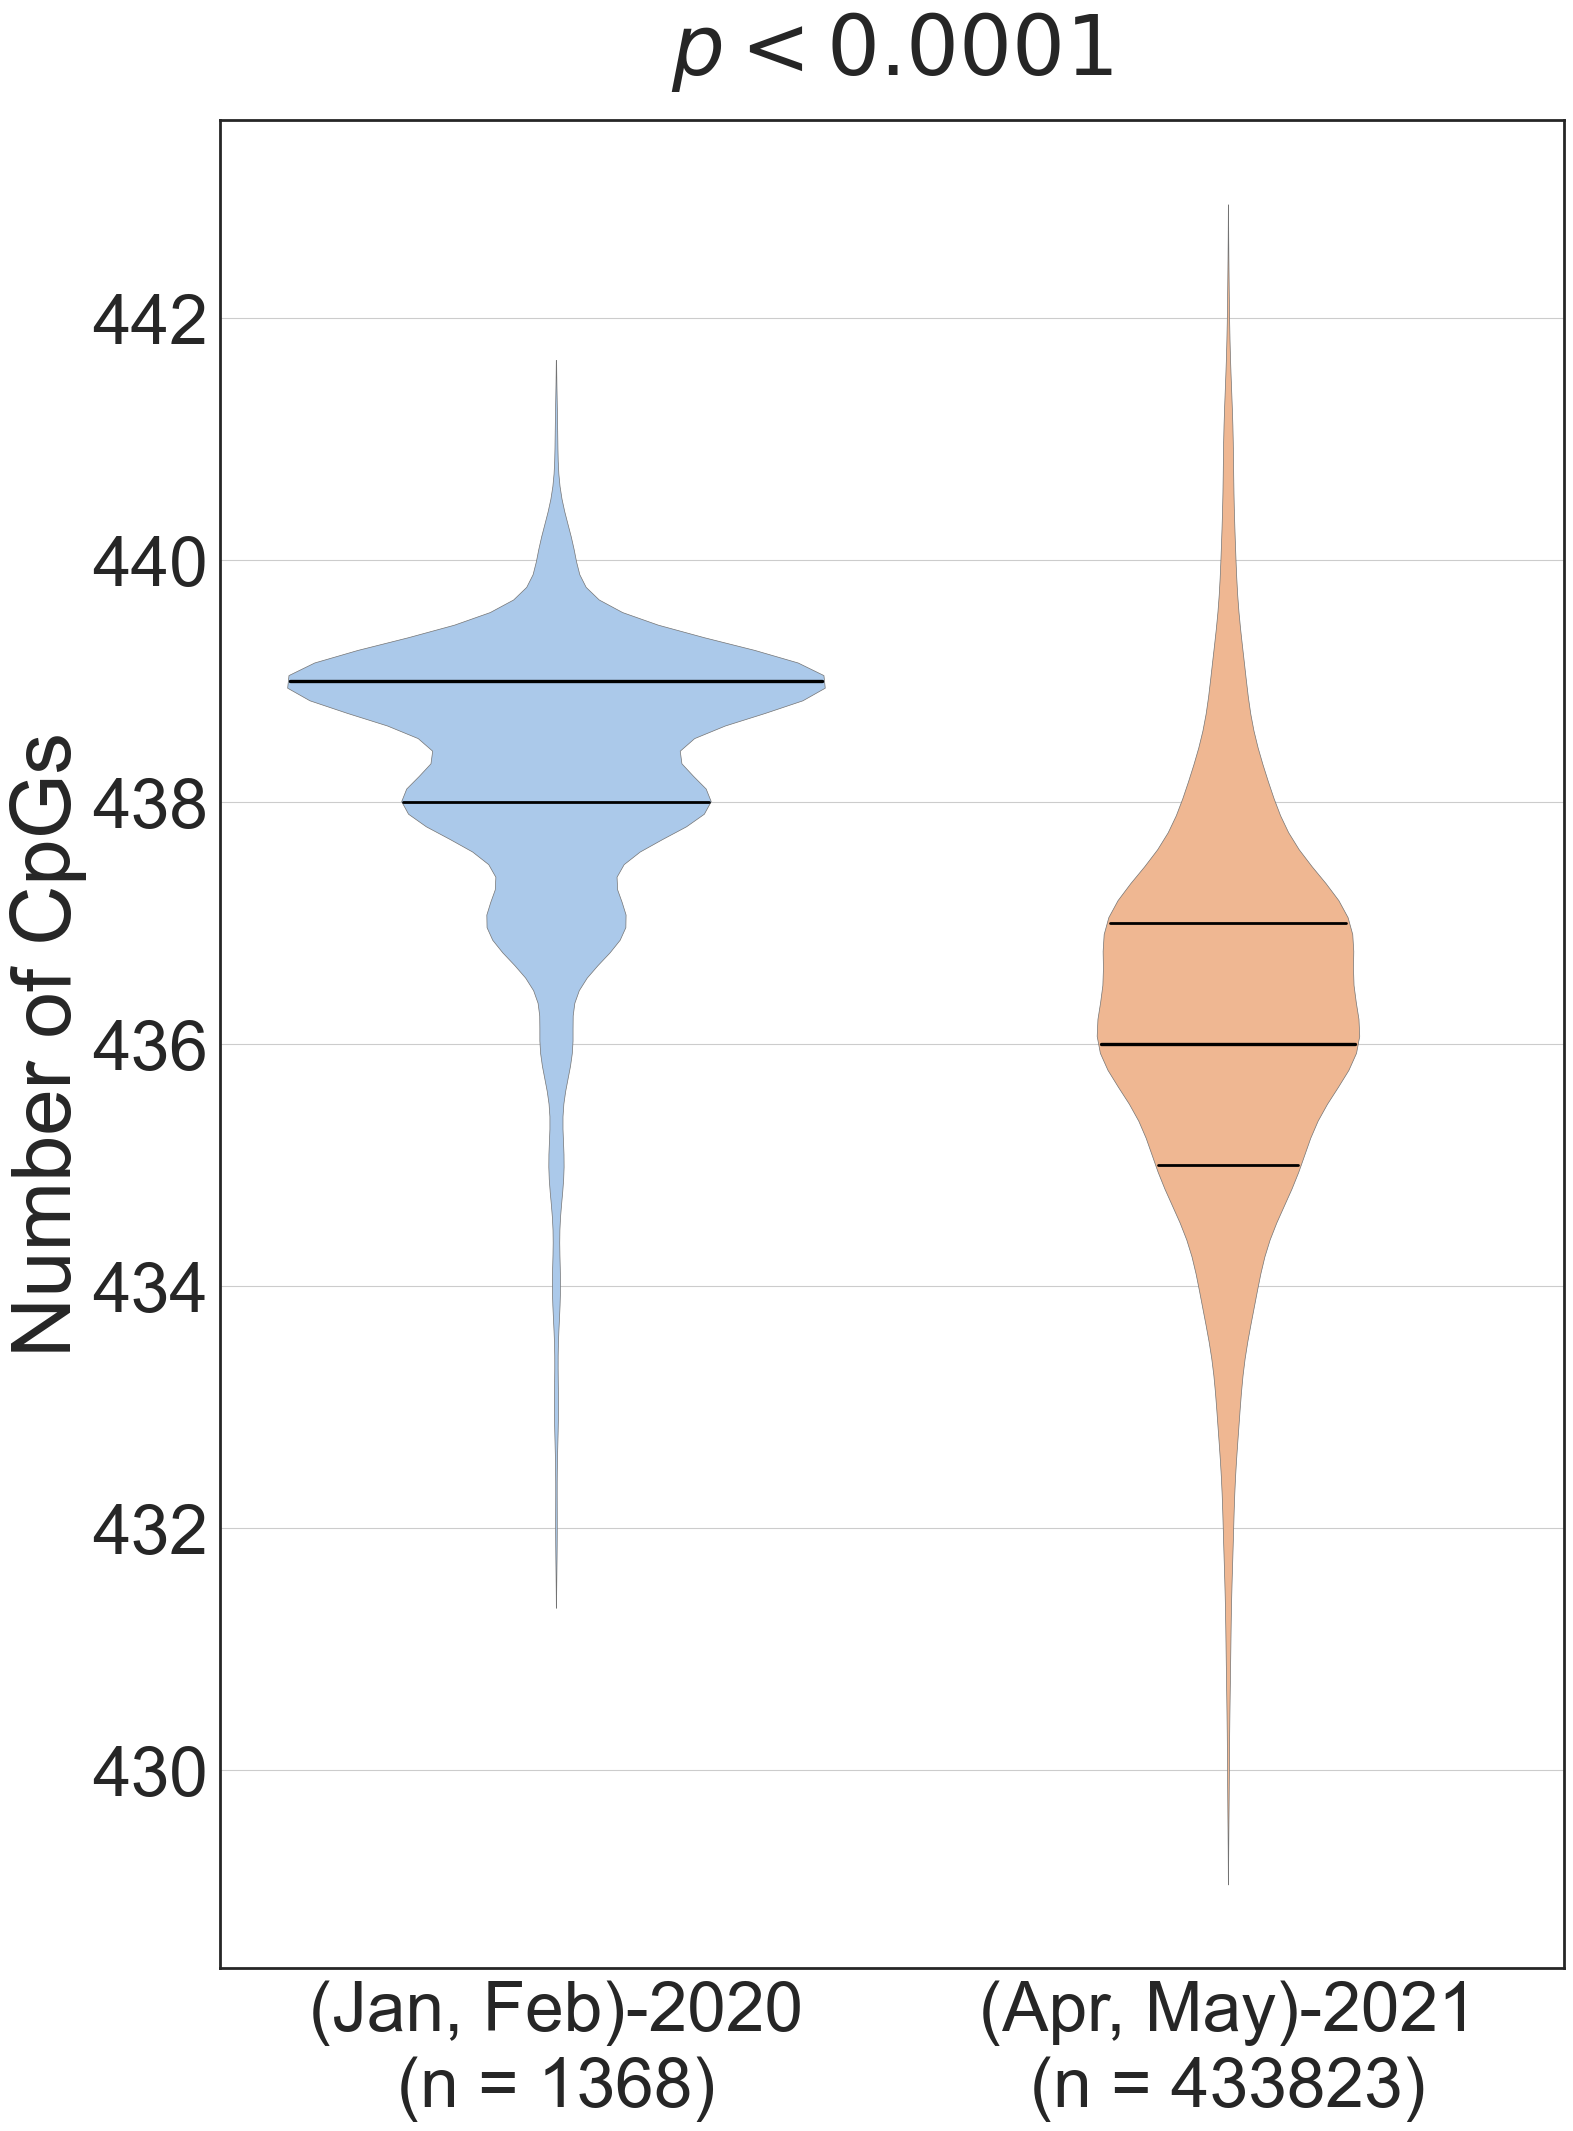

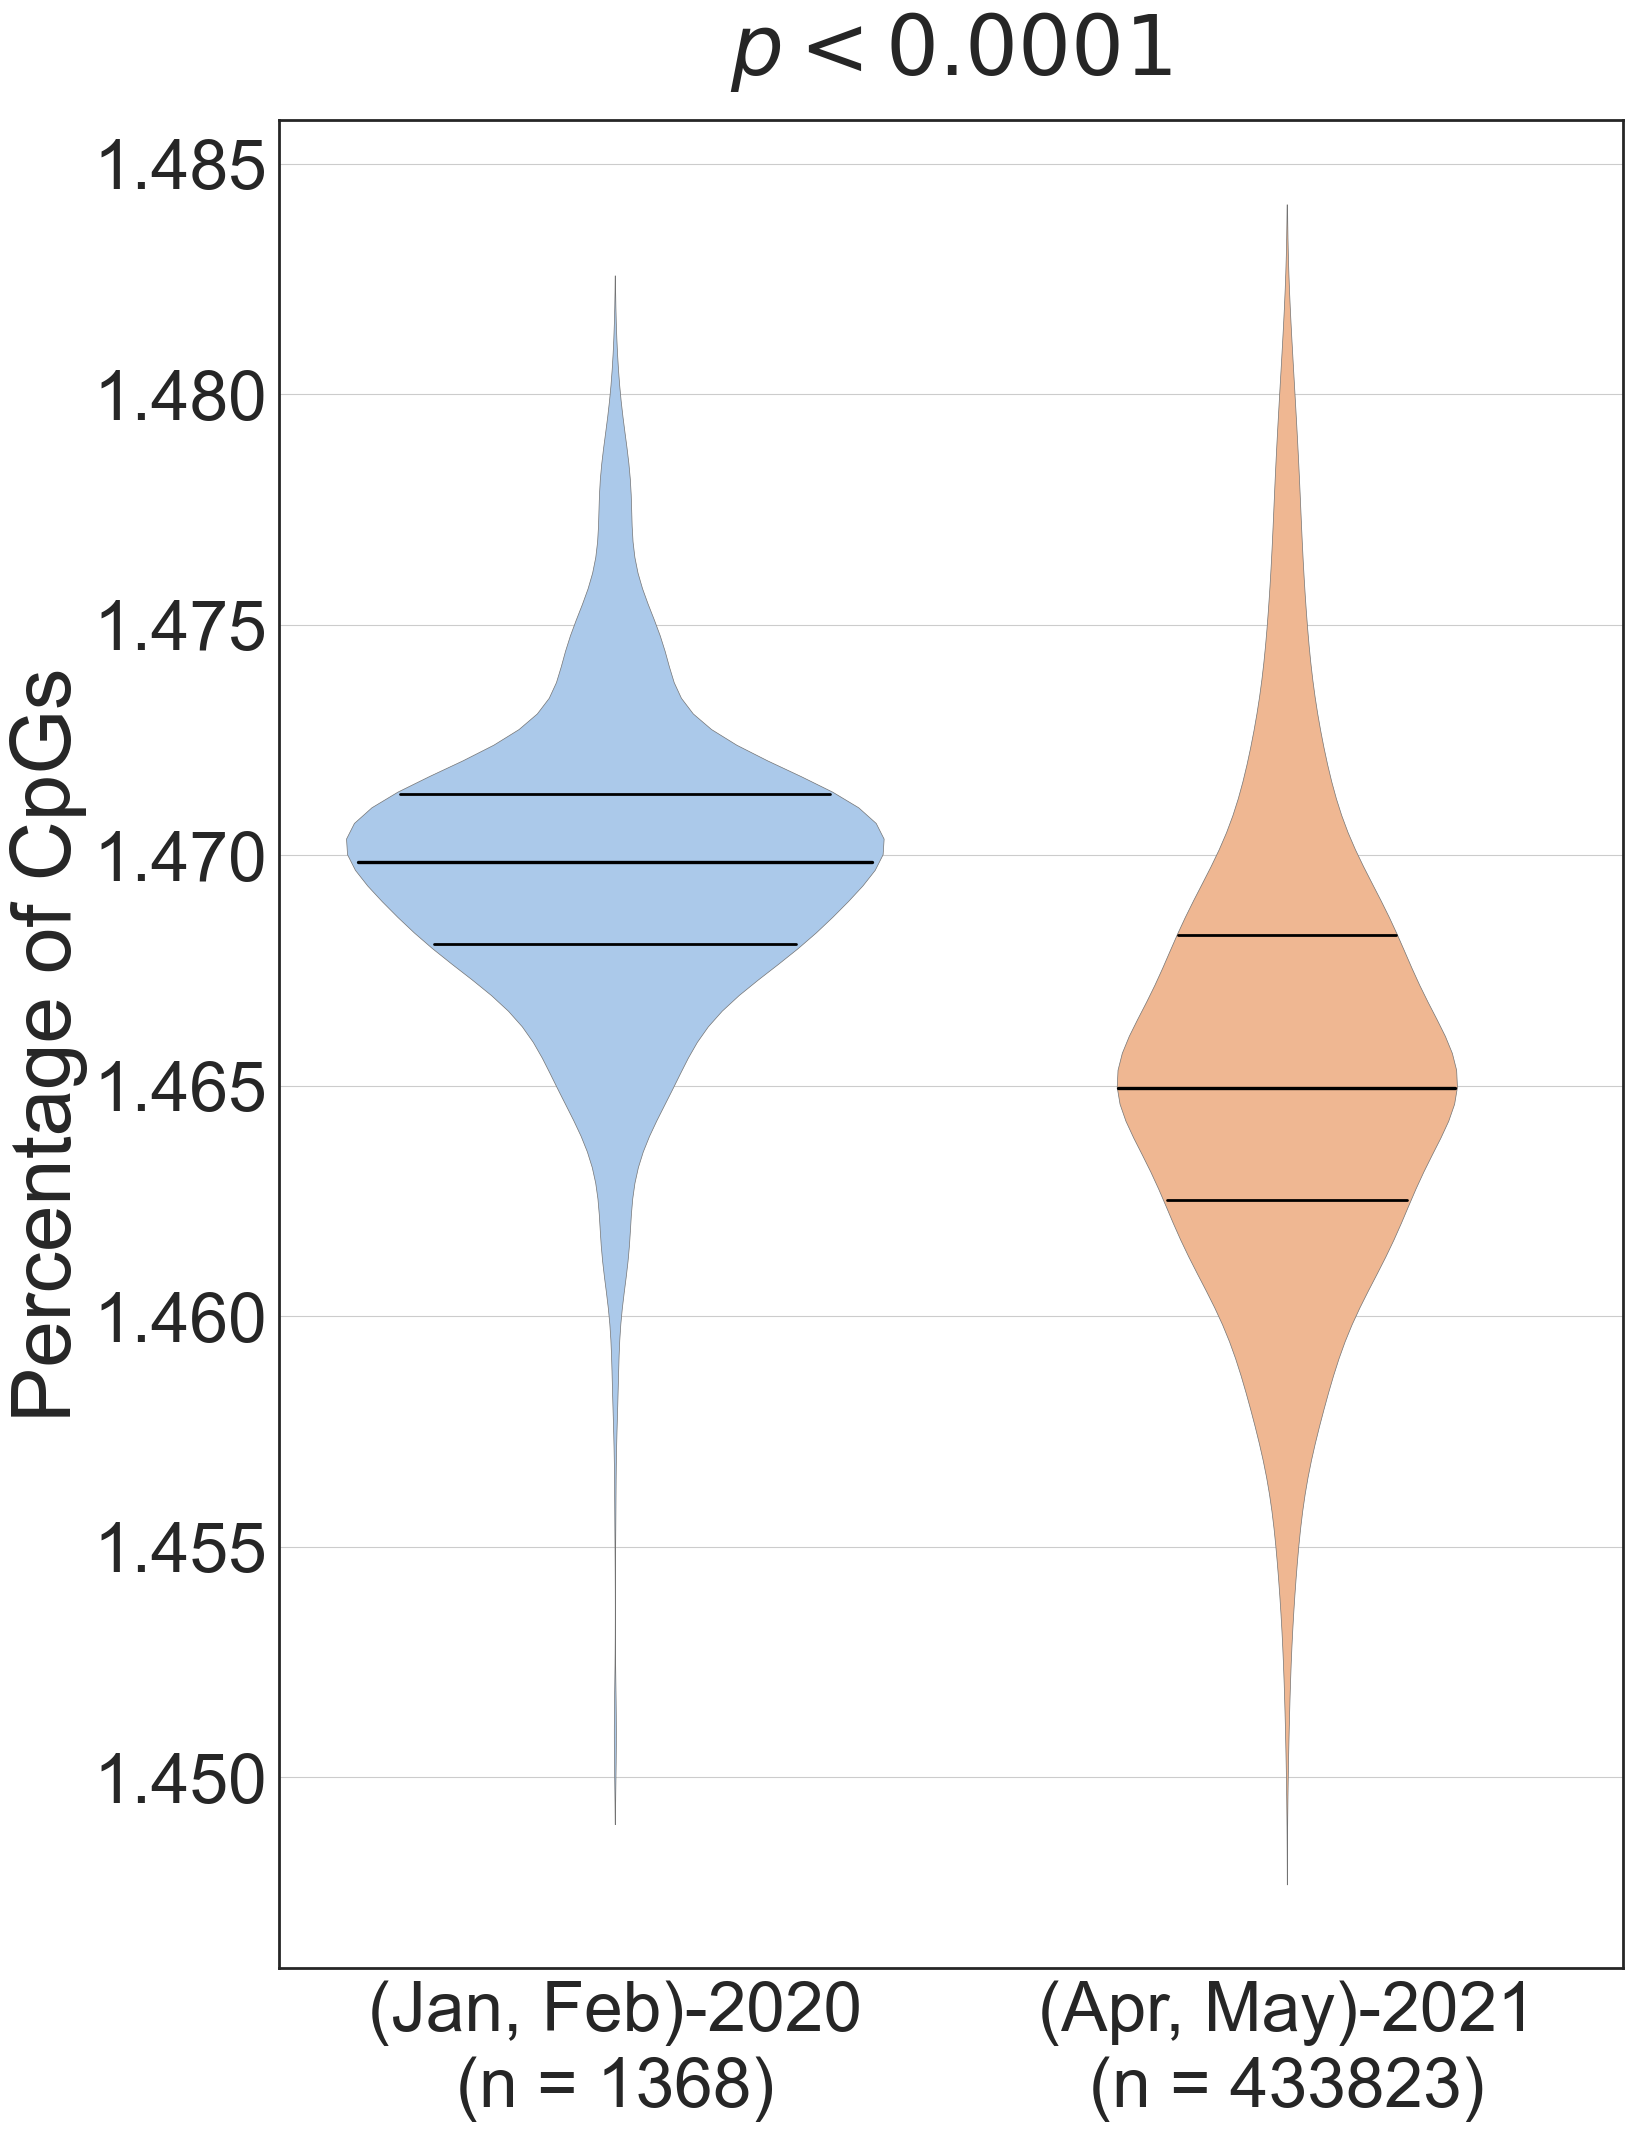

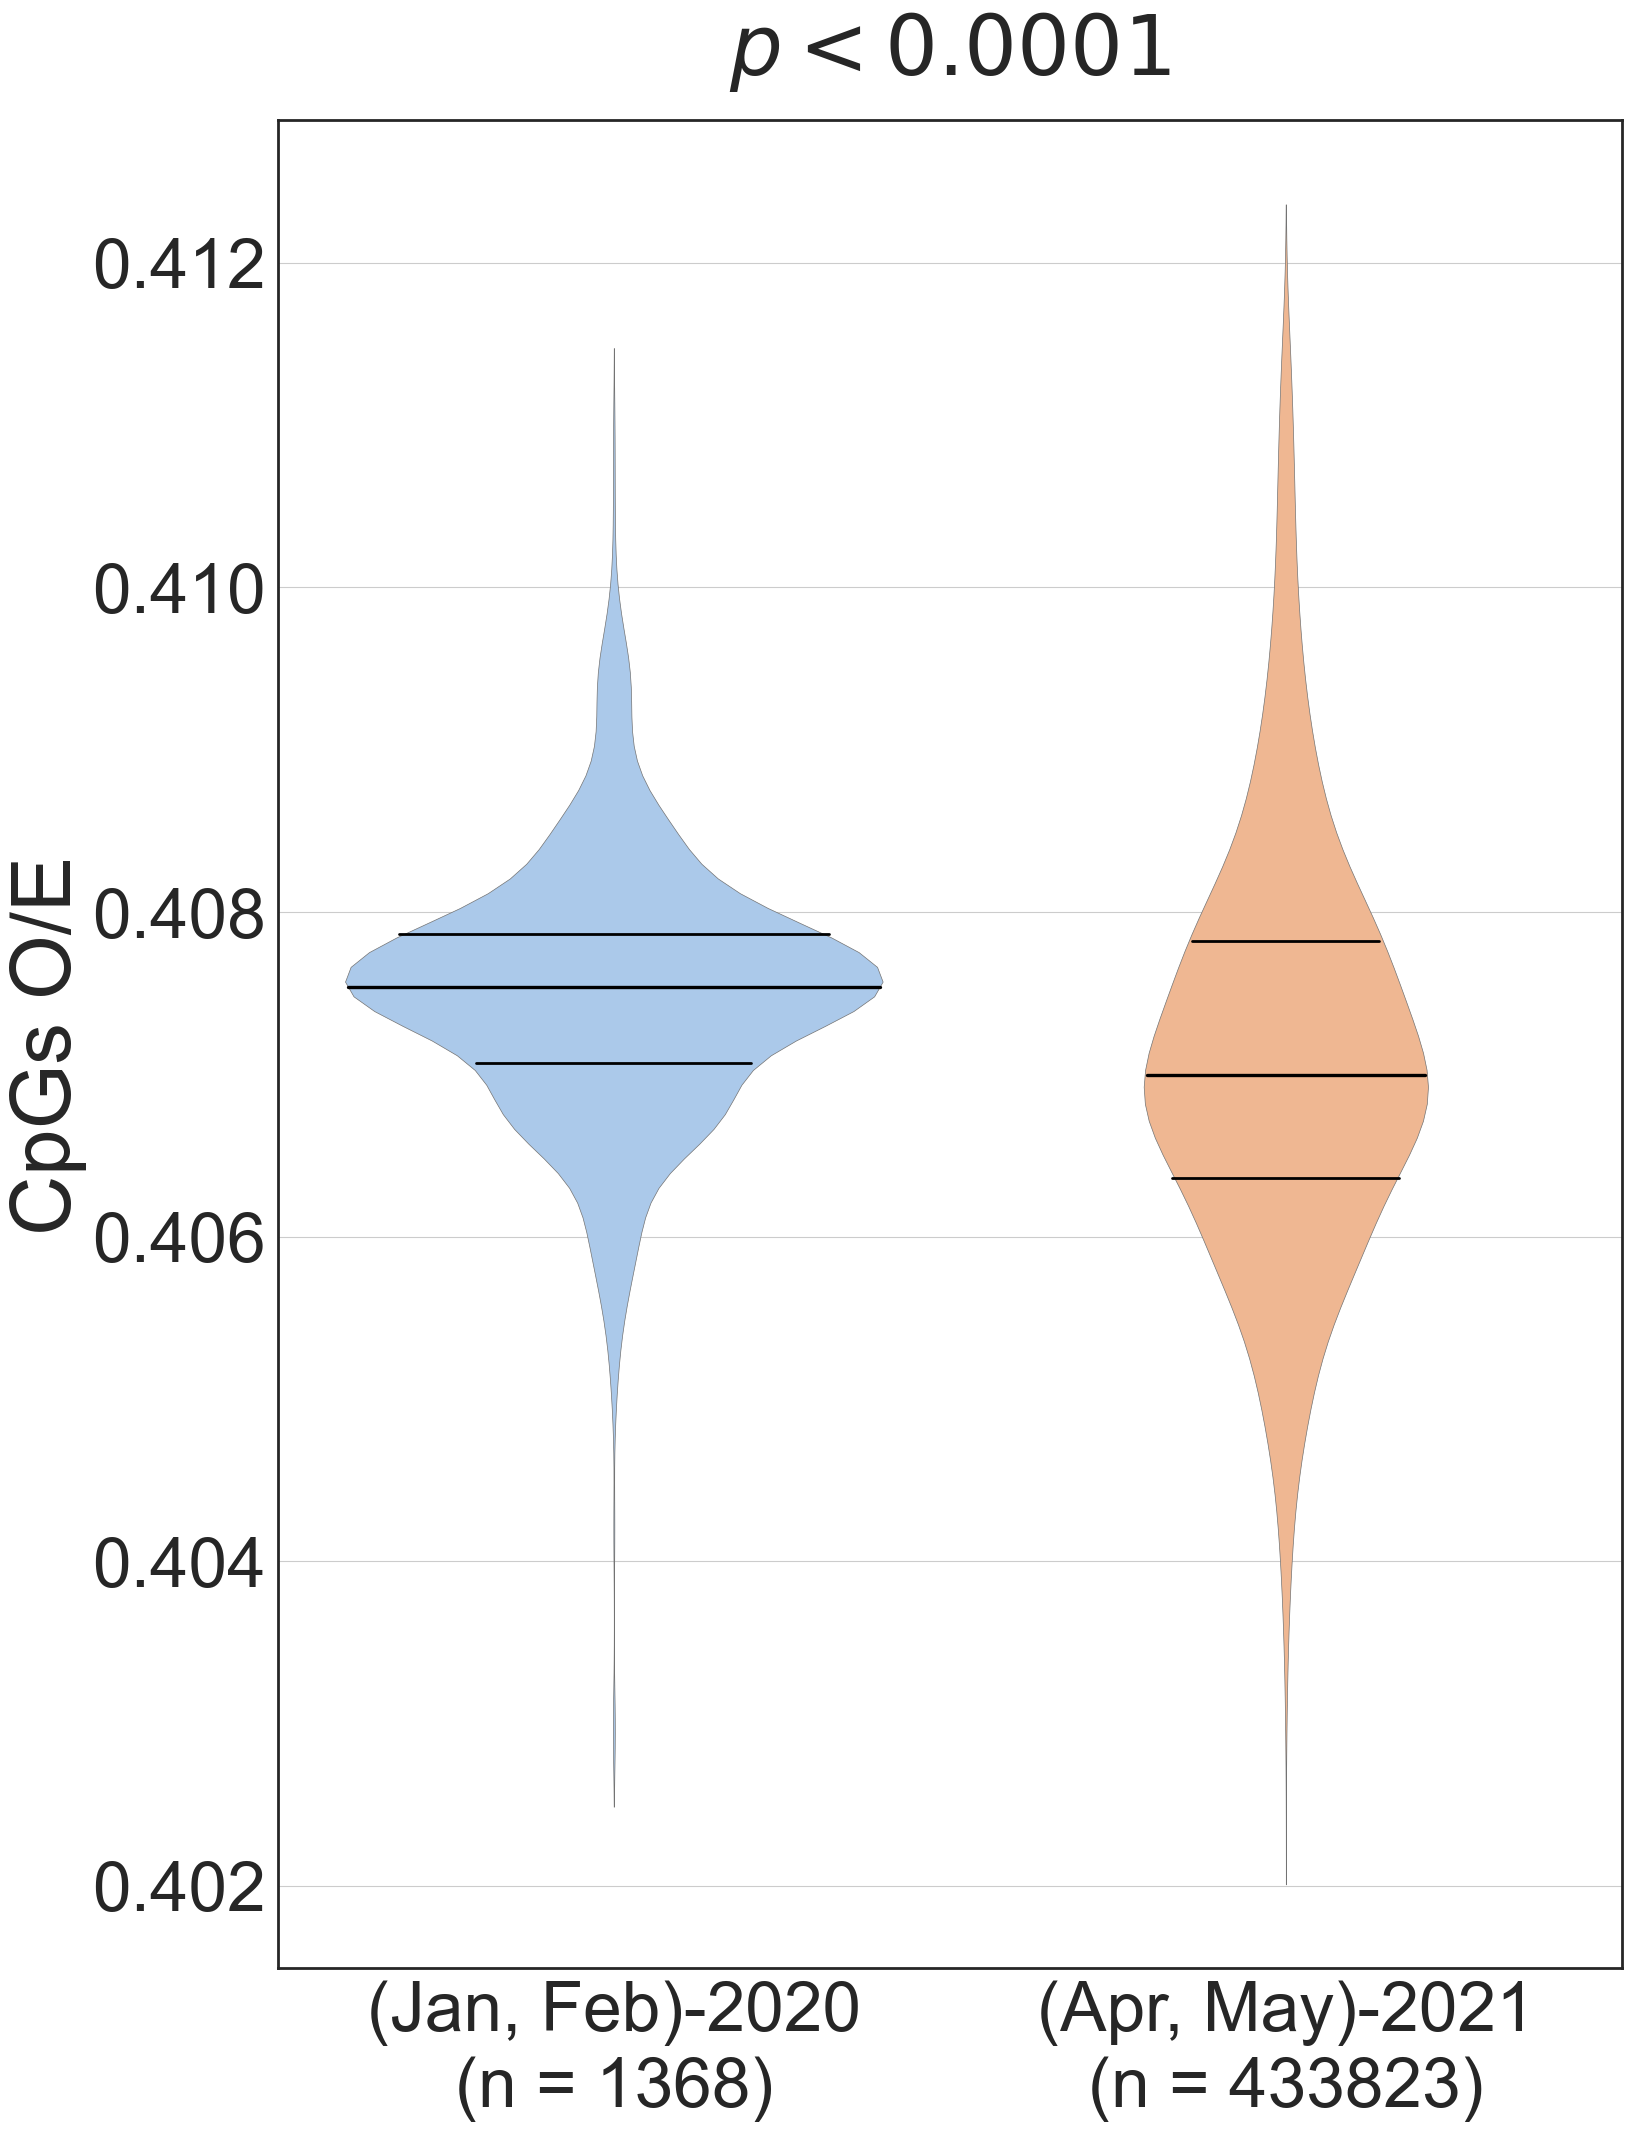

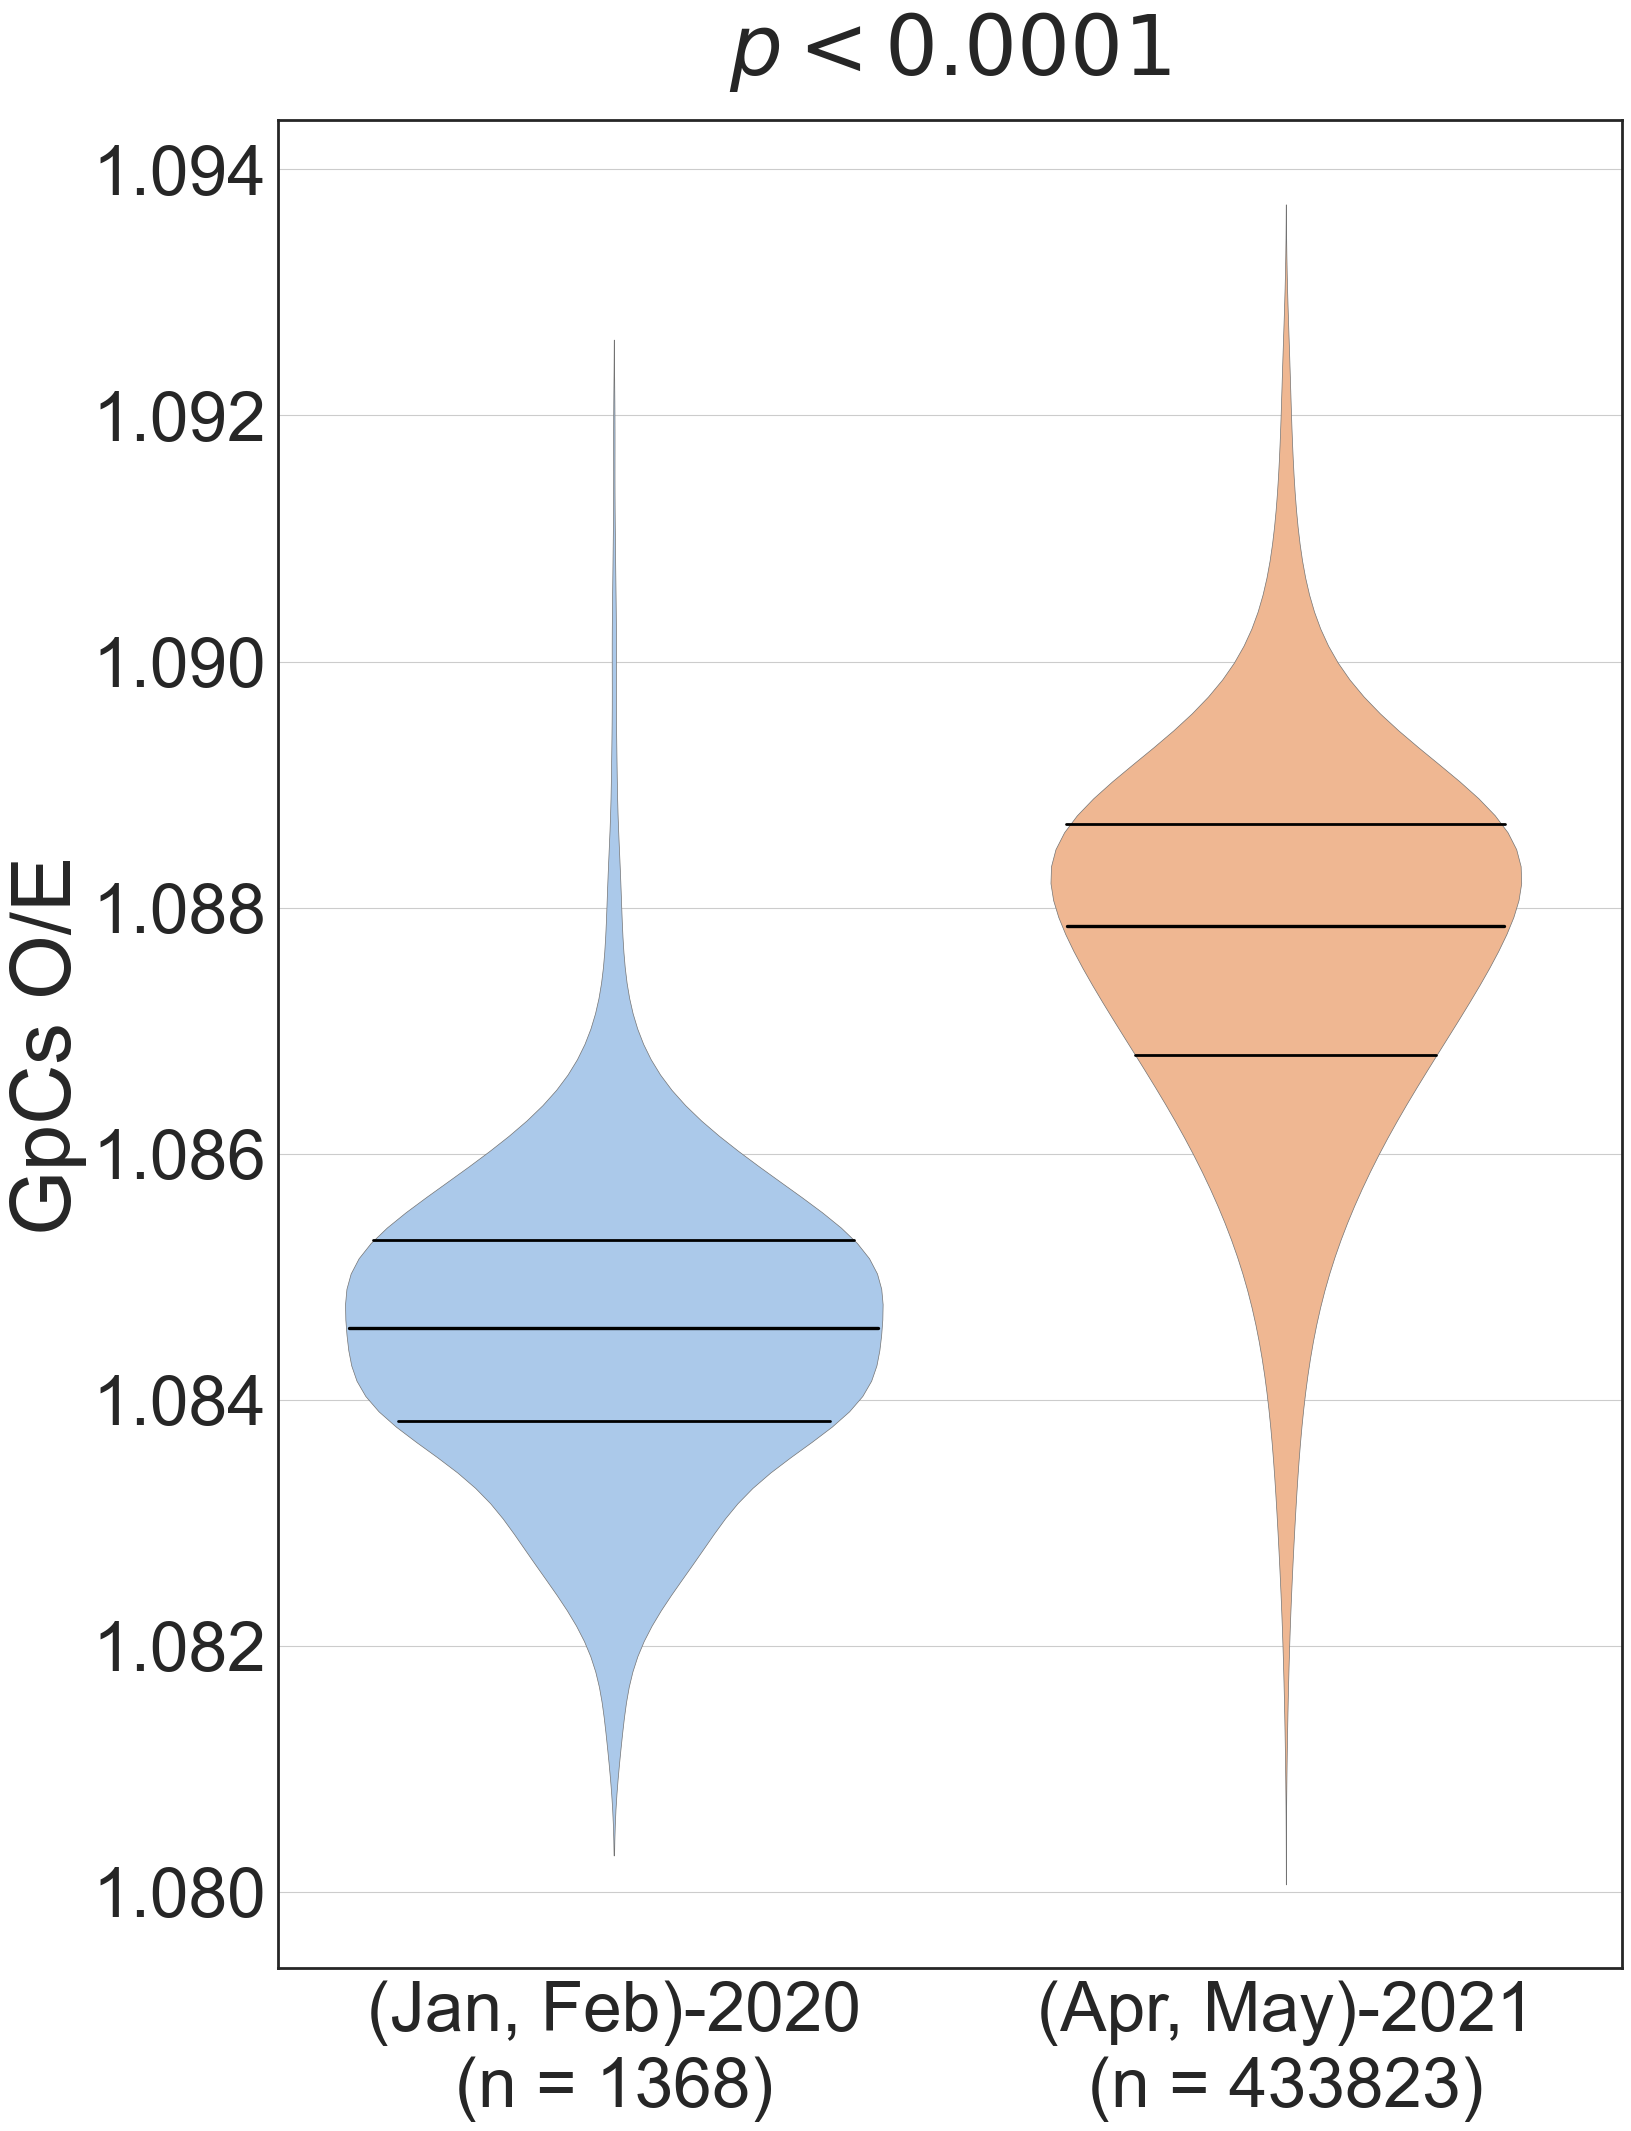

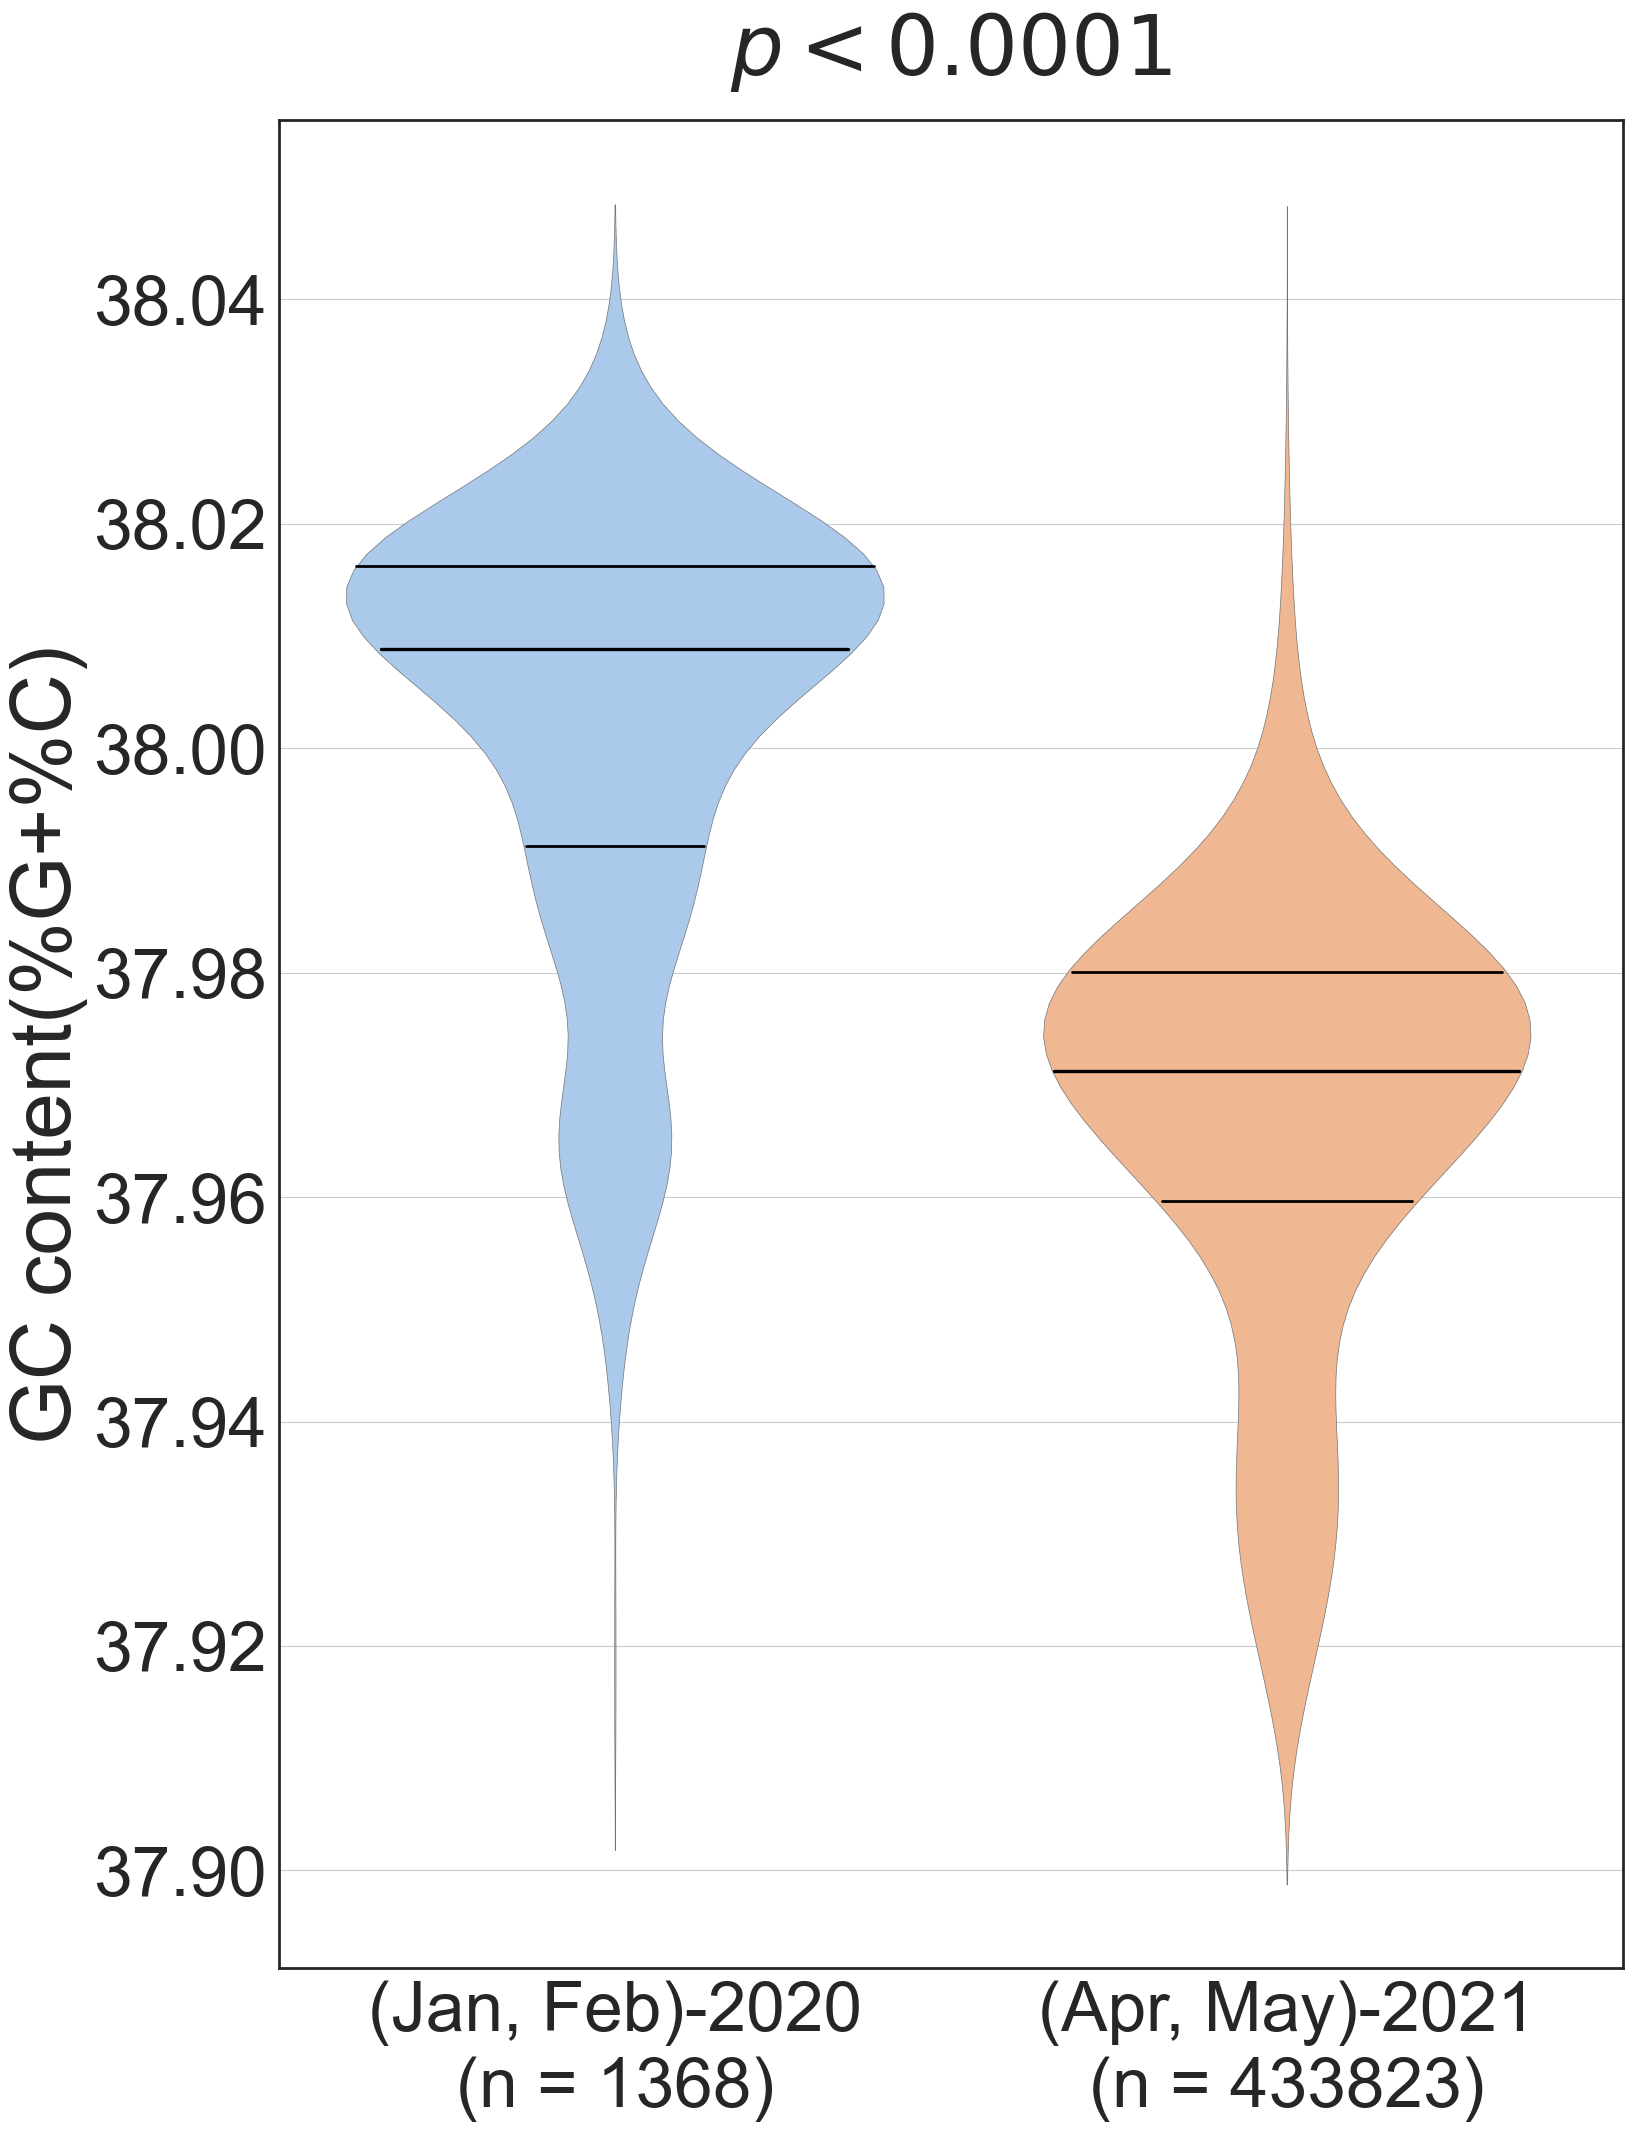

In [24]:
violinplot_plotter(df_count_CG_V)
violinplot_plotter(df_percent_CG_V)
violinplot_plotter(df_ObyE_CG_V)
violinplot_plotter(df_ObyE_GC_V)
violinplot_plotter(df_GC_content_V)

### CpG dinucleotide content of SARS-CoV-2 variants of concern (VOCs)

In [25]:
df_earliest_two_months_count_CG = df[
    (df.dates <= '2020-02-29') & (df.dates >= '2020-01-01')
].loc[:, ['count_CG']]
df_earliest_two_months_count_CG = df_earliest_two_months_count_CG.assign(hue='2020')

df_alpha_count_CG = df_alpha.loc[:, ['count_CG']]
df_alpha_count_CG = df_alpha_count_CG.assign(hue='VOC Alpha')

df_beta_count_CG = df_beta.loc[:, ['count_CG']]
df_beta_count_CG = df_beta_count_CG.assign(hue='VOC Beta')

df_gamma_count_CG = df_gamma.loc[:, ['count_CG']]
df_gamma_count_CG = df_gamma_count_CG.assign(hue='VOC Gamma')

df_delta_count_CG = df_delta.loc[:, ['count_CG']]
df_delta_count_CG = df_delta_count_CG.assign(hue='VOC Delta')

df_nonvocs_count_CG = df_nonvocs.loc[:, ['count_CG']]
df_nonvocs_count_CG = df_nonvocs_count_CG.assign(hue='Non-VOCs')

print(
    f'Number of entries in earliest two months = {len(df_earliest_two_months_count_CG)}'
    f',\nNumber of entries in VOC Alpha = {len(df_alpha_count_CG)}'
    f',\nNumber of entries in VOC Beta = {len(df_beta_count_CG)}'
    f',\nNumber of entries in VOC Gamma = {len(df_gamma_count_CG)}'
    f',\nNumber of entries in VOC Delta = {len(df_delta_count_CG)}'
    f',\nNumber of entries in Non-VOCs = {len(df_nonvocs_count_CG)}'
)

df_count_CG_V_fig7 = pd.concat(
    [
        df_earliest_two_months_count_CG,
        df_alpha_count_CG,
        df_beta_count_CG,
        df_gamma_count_CG,
        df_delta_count_CG,
        df_nonvocs_count_CG
    ]
).reset_index(drop=True)

df_count_CG_V_fig7.name = 'Number of CpGs'

Number of entries in earliest two months = 1368,
Number of entries in VOC Alpha = 616626,
Number of entries in VOC Beta = 16247,
Number of entries in VOC Gamma = 34162,
Number of entries in VOC Delta = 32109,
Number of entries in Non-VOCs = 717950


### Kruskal-Wallis H-test for independent samples (For Fig. 7)

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [26]:
F, p = stats.kruskal(
    df_earliest_two_months_count_CG['count_CG'],
    df_alpha_count_CG['count_CG'],
    df_beta_count_CG['count_CG'],
    df_gamma_count_CG['count_CG'],
    df_delta_count_CG['count_CG'],
    df_nonvocs_count_CG['count_CG']
)
print(f'Kruskal-Wallis H-test results: F: {F}, p: {p}')

Kruskal-Wallis H-test results: F: 176102.74390813988, p: 0.0


### Fig. 7 

In [27]:
sns.set_theme(
    style='white', rc={'axes.grid': True}
)
sns.set_context(
    'paper', font_scale=1, 
    rc={ 
        'ytick.labelsize': 60, 
        'xtick.labelsize': 60, 
        'axes.edgecolor': 'black', 
        'axes.linewidth': 2, 
        'xtick.major.size': 15, 
        'xtick.major.width': 2, 
        'ytick.major.size': 15,
        'ytick.major.width': 2
    }
)

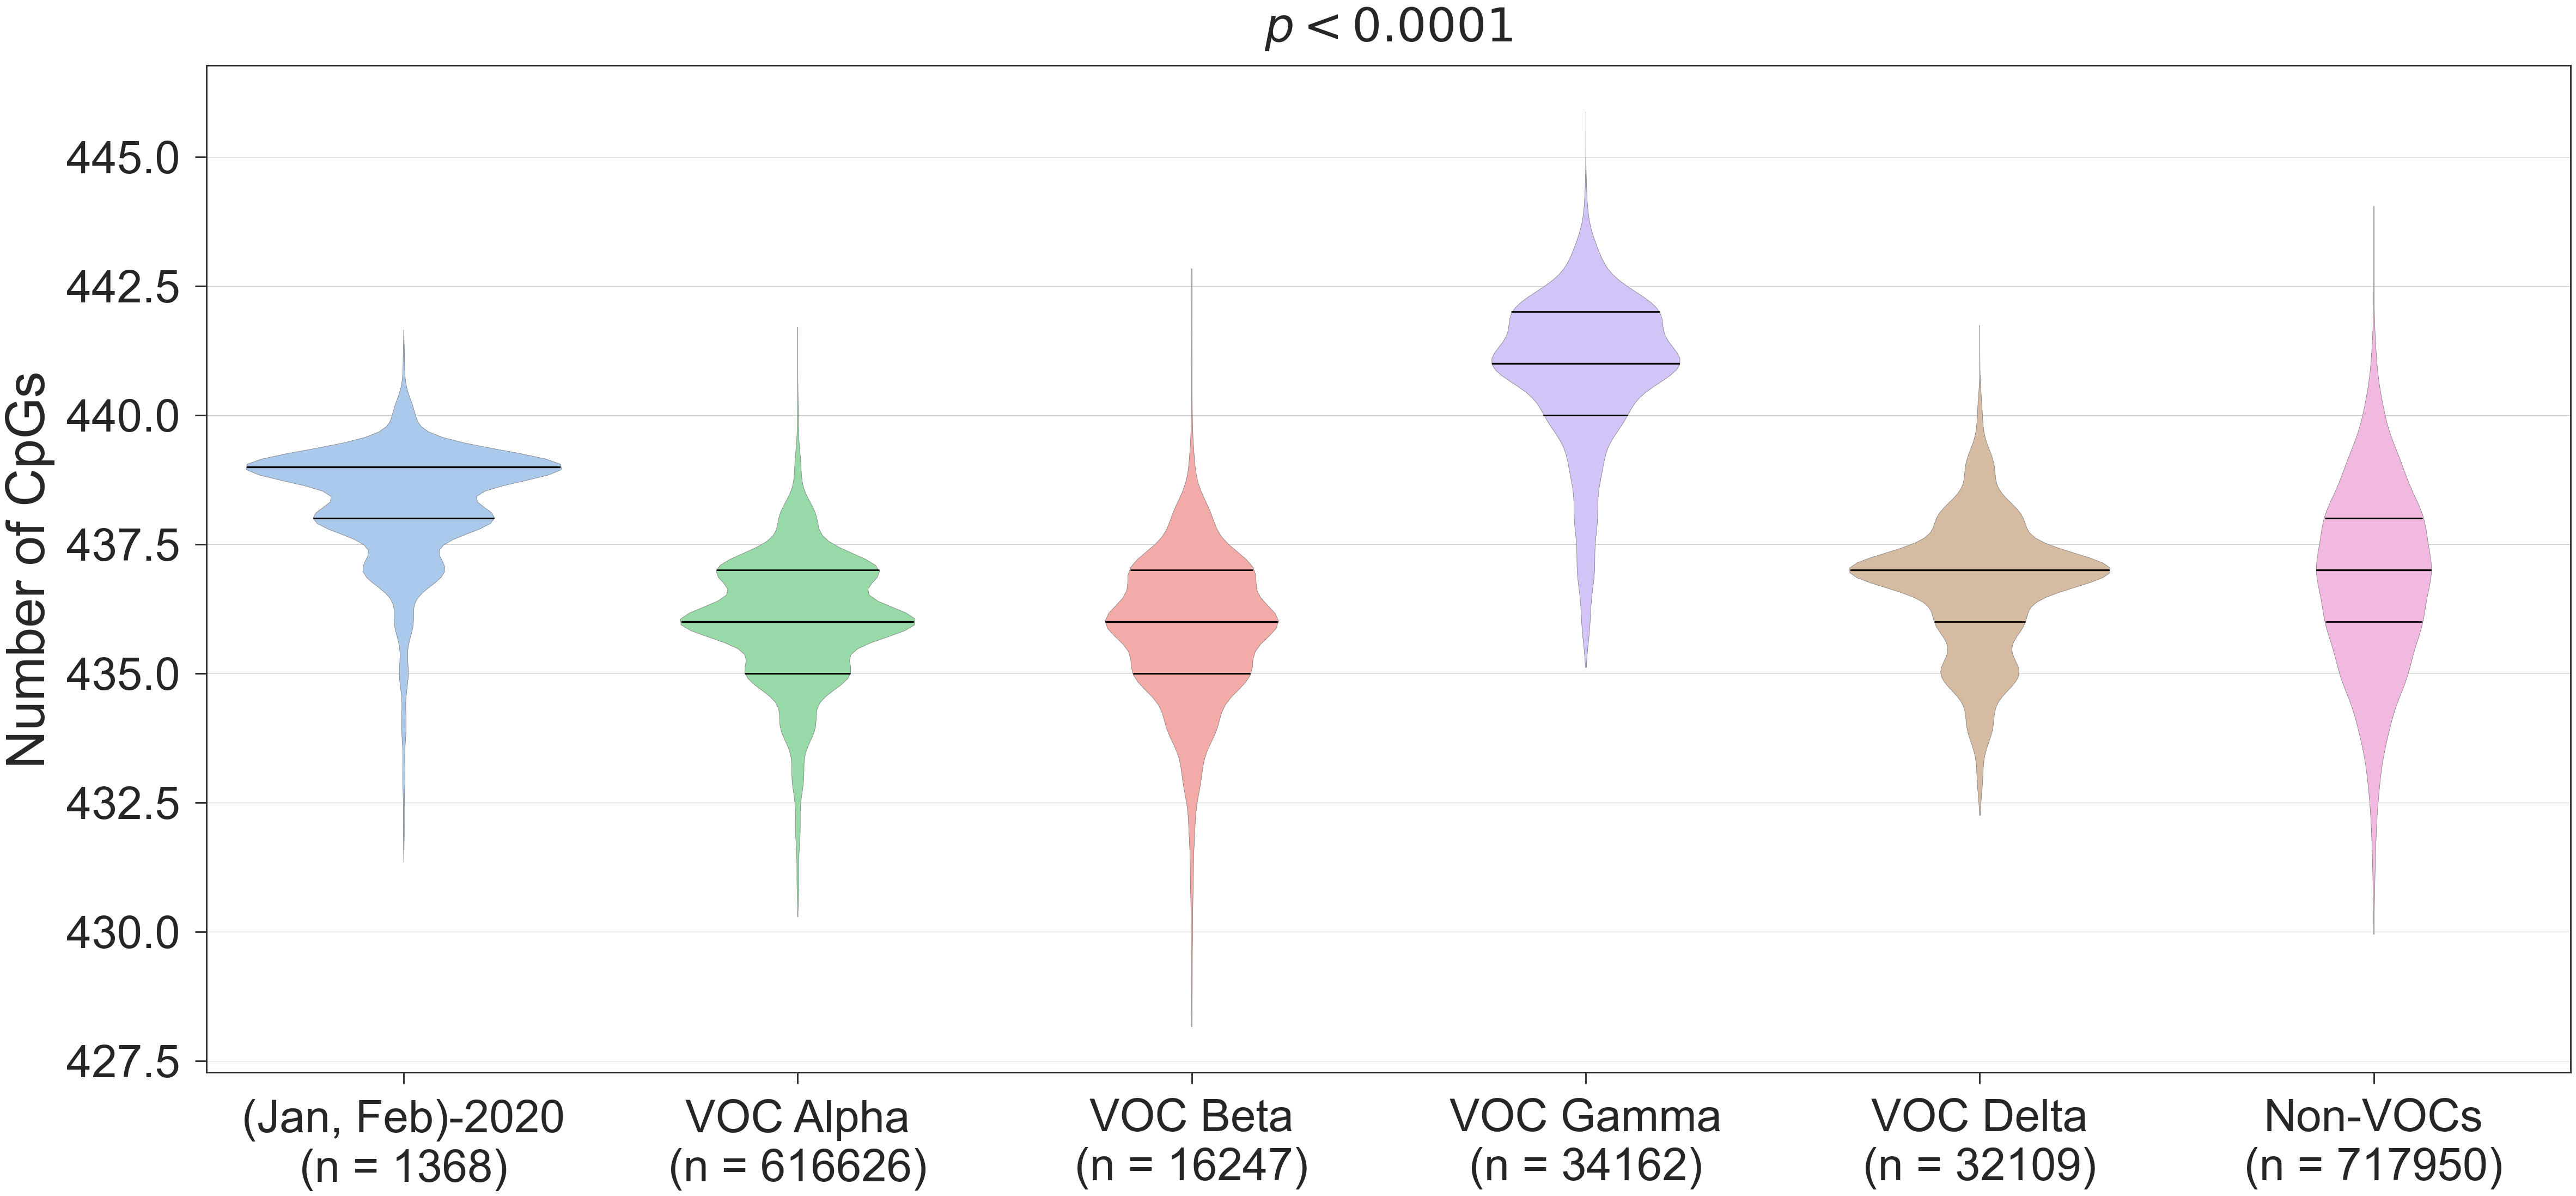

In [28]:
to_plot = df_count_CG_V_fig7

plt.figure(figsize=(56, 24))

plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

my_palette = [
    '#a1c9f4', 
    '#8de5a1', 
    '#ff9f9b', 
    '#d0bbff', 
    '#debb9b', 
    '#fab0e4', 
    '#ffb482'
]

ax = sns.violinplot(
    x='hue', y=to_plot.columns.values[0], 
    data=to_plot, 
    order=[
        '2020', 
        'VOC Alpha', 
        'VOC Beta', 
        'VOC Gamma', 
        'VOC Delta', 
        'Non-VOCs'
    ], 
    inner='quartile', 
    linewidth=0.5, bw=0.3, 
    palette=my_palette
)

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.4)
    l.set_color('black')
ax.set_xticklabels(
    [
        '(Jan, Feb)-2020''\n'f'(n = {len(df_earliest_two_months_count_CG)})', 
        'VOC Alpha''\n'f'(n = {len(df_alpha_count_CG)})', 
        'VOC Beta''\n'f'(n = {len(df_beta_count_CG)})', 
        'VOC Gamma''\n'f'(n = {len(df_gamma_count_CG)})', 
        'VOC Delta''\n'f'(n = {len(df_delta_count_CG)})', 
        'Non-VOCs''\n'f'(n = {len(df_nonvocs_count_CG)})'
    ]
)
ax.text(
    0.5, 1.06, r'$p < 0.0001$', 
    horizontalalignment='center', verticalalignment='top', 
    transform=ax.transAxes, 
    size=62
)
ax.set_ylabel(f'{to_plot.name}', size=70, labelpad=15)
ax.set_xlabel(None)
plt.gca().tick_params(axis='x', which='major', pad=20)
plt.gca().tick_params(axis='y', which='major', pad=20)


### CpG dinucleotide content of SARS-CoV-2 Omicron variant

In [29]:
df_omicron_count_CG = df_omicron.loc[:, ['count_CG']]
df_omicron_count_CG = df_omicron_count_CG.assign(hue='VOC Omicron')

print(
    f'Number of entries in earliest two months = {len(df_earliest_two_months_count_CG)}'
    f',\nNumber of entries in VOC Omicron = {len(df_omicron_count_CG)}'
    f',\nNumber of entries in Non-VOCs = {len(df_nonvocs_count_CG)}'
)

df_count_CG_V_supp4 = pd.concat(
    [
        df_earliest_two_months_count_CG,
        df_omicron_count_CG,
        df_nonvocs_count_CG
    ]
).reset_index(drop=True)

df_count_CG_V_supp4.name = 'Number of CpGs'

Number of entries in earliest two months = 1368,
Number of entries in VOC Omicron = 5436,
Number of entries in Non-VOCs = 717950


#### Mann-Whitney U test (For Supplementary Fig. 4)

In [30]:
df_earliest_two_months_count_CG.name = 'Earliest two months'
df_omicron_count_CG.name = 'VOC Omicron'
df_nonvocs_count_CG.name = 'Non-VOCs'

# ------------------------ Mann-Whitney U test ------------------------

print(f'Mann-Whitney U test results for {df_count_CG_V_supp4.name}: ')

m, p = stats.mannwhitneyu(
        df_earliest_two_months_count_CG['count_CG'], df_omicron_count_CG['count_CG'], 
        alternative='two-sided', 
        method='auto'
    )
print(f'->  For {df_omicron_count_CG.name} and {df_earliest_two_months_count_CG.name}, m: {m} and p: {p}')

m, p = stats.mannwhitneyu(
        df_nonvocs_count_CG['count_CG'], df_omicron_count_CG['count_CG'], 
        alternative='two-sided', 
        method='auto'
    )
print(f'->  For {df_nonvocs_count_CG.name} and {df_omicron_count_CG.name}, m: {m} and p: {p}')

m, p = stats.mannwhitneyu(
        df_nonvocs_count_CG['count_CG'], df_earliest_two_months_count_CG['count_CG'], 
        alternative='two-sided', 
        method='auto'
    )
print(f'->  For {df_nonvocs_count_CG.name} and {df_earliest_two_months_count_CG.name}, m: {m} and p: {p}')

Mann-Whitney U test results for Number of CpGs: 
->  For VOC Omicron and Earliest two months, m: 2849600.5 and p: 1.452211488413756e-41
->  For Non-VOCs and VOC Omicron, m: 999924918.5 and p: 0.0
->  For Non-VOCs and Earliest two months, m: 222730178.0 and p: 2.674003282182529e-276


From the results of Mann-Whitney U tests, we can safely say that p < 0.0001 for 'Number of CpGs' of data from 'Earliest two months', 'VOC Omicron', and 'Non-VOCs'.

Hence, we'll use p < 0.0001 for their violinplots.

#### Supplementary Fig. 4

In [31]:
sns.set_theme(
    style='white', rc={'axes.grid': True}
)
sns.set_context(
    'paper', font_scale=1, 
    rc={ 
        'ytick.labelsize': 50, 
        'xtick.labelsize': 50, 
        'axes.edgecolor': 0.05, 
        'axes.linewidth': 2
    }
)

(428.0, 451.0)

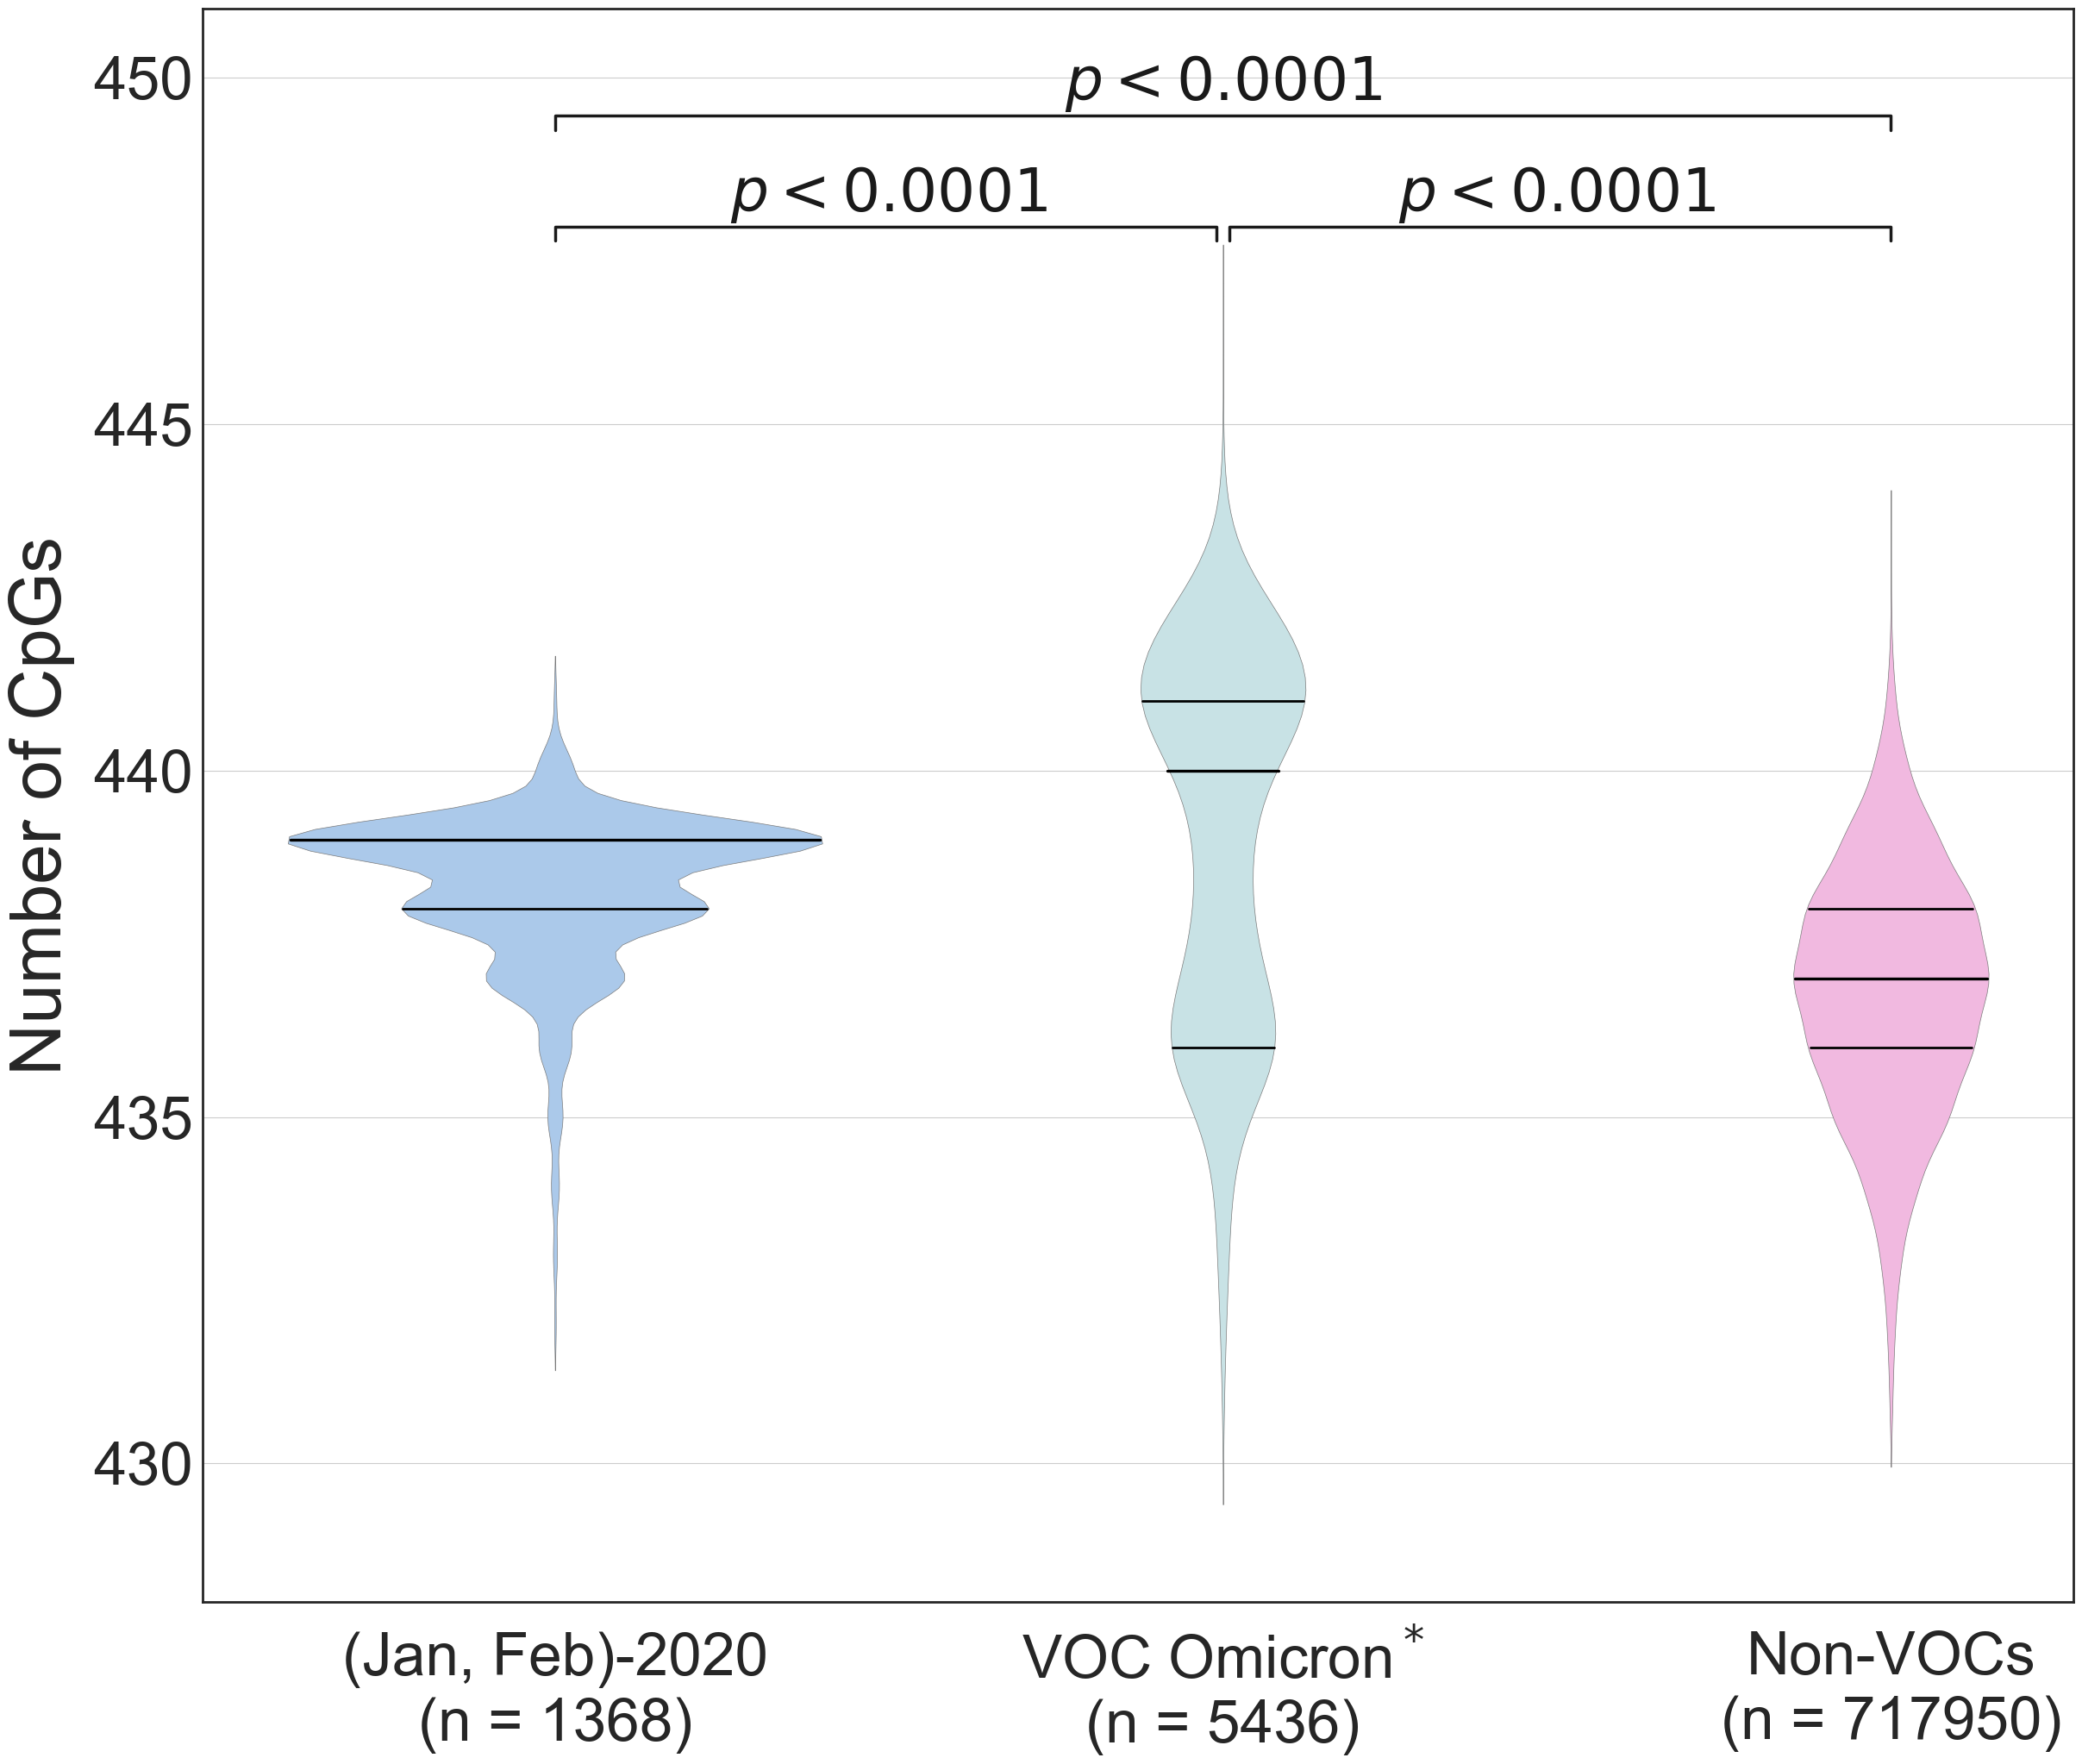

In [32]:
to_plot = df_count_CG_V_supp4

plt.figure(figsize=(28, 24))

my_palette = ['#a1c9f4', '#C3E6EA', '#fab0e4']

ax = sns.violinplot(
    x='hue', y=to_plot.columns.values[0], 
    data=to_plot, 
    order=[
        '2020',  
        'VOC Omicron', 
        'Non-VOCs'
    ], 
    inner='quartile', 
    linewidth=0.5, bw=0.3, 
    palette=my_palette
)

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.4)
    l.set_color('black')

# statistical annotation
x1, x2 = 0, 1   
y, h, col = df_count_CG_V_supp4.count_CG.max() + 1.65, .2, 'k'
plt.plot(
    [x1, x1, x2-.01, x2-.01], [y, y+h, y+h, y], 
    lw=2.5, 
    c=col
)
plt.text(
    (x1+x2)*.5, y+h+.03, r'$p < 0.0001$', 
    ha='center', va='bottom', 
    color=col, 
    size=50
)

x1, x2 = 1, 2
y, h, col = df_count_CG_V_supp4.count_CG.max() + 1.65, .2, 'k'
plt.plot(
    [x1+.01, x1+.01, x2, x2], [y, y+h, y+h, y], 
    lw=2.5, 
    c=col
)
plt.text(
    (x1+x2)*.5, y+h+.03, r'$p < 0.0001$', 
    ha='center', va='bottom', 
    color=col, 
    size=50
)

x1, x2 = 0, 2    
y, h, col = df_count_CG_V_supp4.count_CG.max() + 3.25, .2, 'k'
plt.plot(
    [x1, x1, x2, x2], [y, y+h, y+h, y], 
    lw=2.5, 
    c=col
)
plt.text(
    (x1+x2)*.5, y+h+.03, r'$p < 0.0001$', 
    ha='center', va='bottom', 
    color=col, 
    size=50
)


ax.set_xticklabels(
    [
        '(Jan, Feb)-2020''\n'f'(n = {len(df_earliest_two_months_count_CG)})',  
        'VOC Omicron$^*$''\n'f'(n = {len(df_omicron_count_CG)})', 
        'Non-VOCs''\n'f'(n = {len(df_nonvocs_count_CG)})'
    ]
)
ax.set_ylabel(f'{to_plot.name}', size=60, labelpad=15)
ax.set_xlabel(None)
plt.gca().tick_params(axis='x', which='major', pad=20)

plt.ylim(428, 451)
